In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import fastf1 as ff1
from fastf1 import plotting
from dotenv import load_dotenv
import os
from IPython.display import Markdown
import json
import mappings

In [2]:
ff1.Cache.get_cache_info()

(None, None)

In [3]:
ff1.Cache._get_size()

1879744857

In [427]:
ff1.Cache.clear_cache()

In [278]:
session = ff1.get_session(2024, 'Sakhir', 'R')
session.name
session.date
session.event

RoundNumber                                                   1
Country                                                 Bahrain
Location                                                 Sakhir
OfficialEventName    FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2024
EventDate                                   2024-03-02 00:00:00
EventName                                    Bahrain Grand Prix
EventFormat                                        conventional
Session1                                             Practice 1
Session1Date                          2024-02-29 14:30:00+03:00
Session1DateUtc                             2024-02-29 11:30:00
Session2                                             Practice 2
Session2Date                          2024-02-29 18:00:00+03:00
Session2DateUtc                             2024-02-29 15:00:00
Session3                                             Practice 3
Session3Date                          2024-03-01 15:30:00+03:00
Session3DateUtc                         

In [279]:
session.load()

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No ca

In [46]:
session.results.head(5)

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,CountryCode,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points
11,11,S PEREZ,PER,perez,Red Bull Racing,3671C6,red_bull,Sergio,Perez,Sergio Perez,...,MEX,1.0,1,1.0,NaT,NaT,NaT,0 days 01:21:14.894000,Finished,25.0
1,1,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,3671C6,red_bull,Max,Verstappen,Max Verstappen,...,NED,2.0,2,15.0,NaT,NaT,NaT,0 days 00:00:05.355000,Finished,19.0
14,14,F ALONSO,ALO,alonso,Aston Martin,358C75,aston_martin,Fernando,Alonso,Fernando Alonso,...,ESP,3.0,3,2.0,NaT,NaT,NaT,0 days 00:00:20.728000,Finished,15.0
63,63,G RUSSELL,RUS,russell,Mercedes,6CD3BF,mercedes,George,Russell,George Russell,...,GBR,4.0,4,3.0,NaT,NaT,NaT,0 days 00:00:25.866000,Finished,12.0
44,44,L HAMILTON,HAM,hamilton,Mercedes,6CD3BF,mercedes,Lewis,Hamilton,Lewis Hamilton,...,GBR,5.0,5,7.0,NaT,NaT,NaT,0 days 00:00:31.065000,Finished,10.0


In [280]:
laps = session.laps
laps.columns

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate'],
      dtype='object')

In [281]:
# laps[laps['Driver'] == 'VER'].head()
laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 01:01:37.489000,VER,1,0 days 00:01:37.284000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:41.266000,...,False,Red Bull Racing,0 days 00:59:59.911000,2024-03-02 15:03:42.342,12,1.0,False,,False,False
1,0 days 01:03:13.785000,VER,1,0 days 00:01:36.296000,2.0,1.0,NaT,NaT,0 days 00:00:30.916000,0 days 00:00:41.661000,...,False,Red Bull Racing,0 days 01:01:37.489000,2024-03-02 15:05:19.920,1,1.0,False,,False,True
2,0 days 01:04:50.538000,VER,1,0 days 00:01:36.753000,3.0,1.0,NaT,NaT,0 days 00:00:30.999000,0 days 00:00:41.966000,...,False,Red Bull Racing,0 days 01:03:13.785000,2024-03-02 15:06:56.216,1,1.0,False,,False,True
3,0 days 01:06:27.185000,VER,1,0 days 00:01:36.647000,4.0,1.0,NaT,NaT,0 days 00:00:30.931000,0 days 00:00:41.892000,...,False,Red Bull Racing,0 days 01:04:50.538000,2024-03-02 15:08:32.969,1,1.0,False,,False,True
4,0 days 01:08:04.358000,VER,1,0 days 00:01:37.173000,5.0,1.0,NaT,NaT,0 days 00:00:31.255000,0 days 00:00:42.056000,...,False,Red Bull Racing,0 days 01:06:27.185000,2024-03-02 15:10:09.616,1,1.0,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,0 days 02:25:37.835000,SAR,2,0 days 00:01:35.972000,51.0,4.0,NaT,NaT,0 days 00:00:30.781000,0 days 00:00:41.539000,...,True,Williams,0 days 02:24:01.863000,2024-03-02 16:27:44.294,1,20.0,False,,False,True
1125,0 days 02:27:13.822000,SAR,2,0 days 00:01:35.987000,52.0,4.0,NaT,NaT,0 days 00:00:30.775000,0 days 00:00:41.440000,...,True,Williams,0 days 02:25:37.835000,2024-03-02 16:29:20.266,1,20.0,False,,False,True
1126,0 days 02:28:49.910000,SAR,2,0 days 00:01:36.088000,53.0,4.0,NaT,NaT,0 days 00:00:30.798000,0 days 00:00:41.610000,...,True,Williams,0 days 02:27:13.822000,2024-03-02 16:30:56.253,1,20.0,False,,False,True
1127,0 days 02:30:29.524000,SAR,2,0 days 00:01:39.614000,54.0,4.0,NaT,NaT,0 days 00:00:32.179000,0 days 00:00:43.748000,...,True,Williams,0 days 02:28:49.910000,2024-03-02 16:32:32.341,1,20.0,False,,False,True


In [282]:
# Load FastF1's dark color scheme
plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False, color_scheme='fastf1')

req            INFO 	Using cached data for driver_info


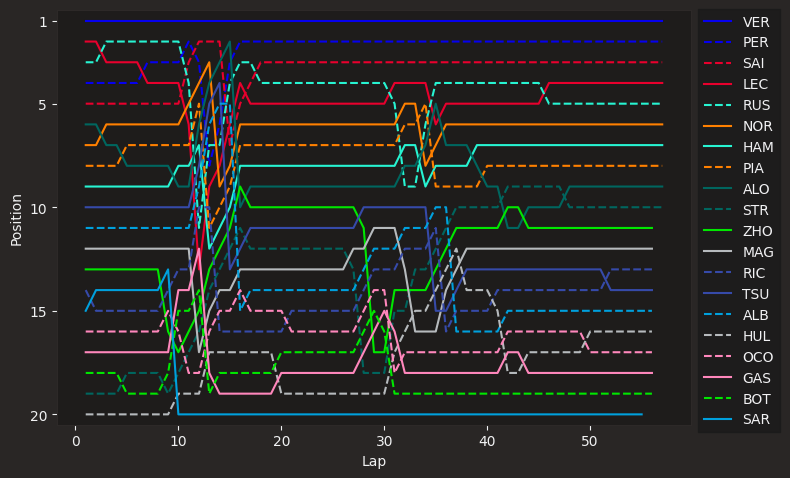

In [283]:
fig, ax = plt.subplots(figsize=(8.0, 4.9))

for drv in session.drivers:
    drv_laps = session.laps.pick_drivers(drv)

    abb = drv_laps['Driver'].iloc[0]
    style = plotting.get_driver_style(identifier=abb,
                                        style=['color', 'linestyle'],
                                        session=session)

    ax.plot(drv_laps['LapNumber'], drv_laps['Position'],
            label=abb, **style)

ax.set_ylim([20.5, 0.5])
ax.set_yticks([1, 5, 10, 15, 20])
ax.set_xlabel('Lap')
ax.set_ylabel('Position')
ax.legend(bbox_to_anchor=(1.0, 1.02))
plt.tight_layout()
plt.show()

In [419]:
ver_lap['Compound']

6    UNKNOWN
7    UNKNOWN
8    UNKNOWN
Name: Compound, dtype: object

In [430]:
ver_lap = session.laps.pick_drivers('VER')
ver_tel = ver_lap.get_telemetry()
ver_tel.head()

KeyError: '33'

In [415]:
ver_car = ver_lap.get_car_data()
ver_car.head()

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime
0,2021-08-29 16:17:00.305,3724.0,0.0,1,0.0,False,1,car,0 days 00:00:00.063000,0 days 04:15:59.178000
1,2021-08-29 16:17:00.545,3487.0,0.0,1,0.0,False,1,car,0 days 00:00:00.303000,0 days 04:15:59.418000
2,2021-08-29 16:17:00.785,3719.0,0.0,1,0.0,False,1,car,0 days 00:00:00.543000,0 days 04:15:59.658000
3,2021-08-29 16:17:01.025,3589.0,0.0,1,0.0,False,1,car,0 days 00:00:00.783000,0 days 04:15:59.898000
4,2021-08-29 16:17:01.265,3567.0,0.0,1,0.0,False,1,car,0 days 00:00:01.023000,0 days 04:16:00.138000


### Laptimes

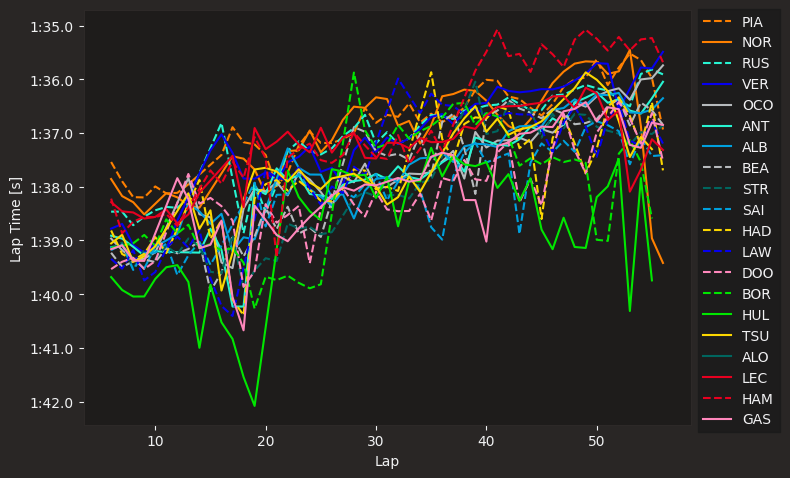

In [ ]:
# Enable Matplotlib patches for plotting timedelta values and load
# FastF1's dark color scheme
plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False,
                          color_scheme='fastf1')

# loop through the drivers and plot the lap times in line scatter plot one in different colors
fig, ax = plt.subplots(figsize=(8.0, 4.9))
for drv in session.drivers:
    drv_laps = session.laps.pick_drivers(drv)

    abb = drv_laps['Driver'].iloc[0]
    style = plotting.get_driver_style(identifier=abb,
                                        style=['color', 'linestyle'],
                                        session=session)
    # take only the laps where the driver did not pit
    drv_laps = drv_laps[~drv_laps['PitInTime'].notna() & ~drv_laps['PitOutTime'].notna()]
    # select only laps after 5th lap
    drv_laps = drv_laps[drv_laps['LapNumber'] > 5]
    
    ax.plot(drv_laps['LapNumber'], drv_laps['LapTime'],
            label=abb, **style)
    
ax.invert_yaxis()
ax.set_xlabel('Lap')
ax.set_ylabel('Lap Time [s]')
ax.legend(bbox_to_anchor=(1.0, 1.02))
plt.tight_layout()
plt.show()

### Gear shifts on Track

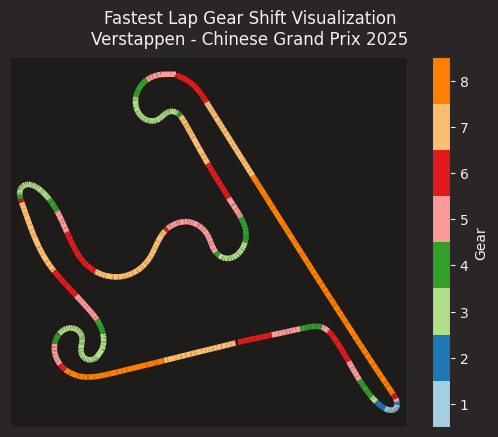

In [81]:
from matplotlib.collections import LineCollection
from matplotlib import colormaps

# take only the fastest lap of the driver
ver_fastest_lap = ver_lap.pick_fastest()
# take only the telemetry data of the driver fastest lap
ver_fastest_lap_tel = ver_fastest_lap.get_telemetry()

x = np.array(ver_fastest_lap_tel['X'].values)
y = np.array(ver_fastest_lap_tel['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1) # lines between points
gear = ver_fastest_lap_tel['nGear'].to_numpy().astype(float)

# Create a colormap from the built-in 'Paired' colormap
cmap = colormaps['Paired']
# Create a LineCollection object with the segments and colormap
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)

lc_comp.set_array(gear)
lc_comp.set_linewidth(4)

plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

title = plt.suptitle(
    f"Fastest Lap Gear Shift Visualization\n"
    f"Verstappen - {session.event['EventName']} {session.event.year}"
)

cbar = plt.colorbar(mappable=lc_comp, label="Gear",
                    boundaries=np.arange(1, 10))
cbar.set_ticks(np.arange(1.5, 9.5))
cbar.set_ticklabels(np.arange(1, 9))


plt.show()

### Let's do some preprocessing

In [7]:
# functions
def convert_time(data, column, fillna_value=None):
    """convert the time column to seconds and set the first driver to 0 and NaN values to 200 seconds
    the input should look like this: "0 days 01:54:21.964000"  "0 days 00:00:10.933000"
    """
    # Convert to timedelta, then to float seconds
    data[column] = pd.to_timedelta(data[column]).dt.total_seconds()
    # set NaN values to 200 seconds (retired drivers)
    data[column] = data[column].fillna(fillna_value) if fillna_value is not None else data[column]
    return data

First the whole session results

In [54]:
session_results = session.results[['Abbreviation', 'TeamId', 'CountryCode', 'ClassifiedPosition', 'GridPosition', 'Time', 'Points']].copy()
# adding a new column called retired and fill it with 0
session_results['Retired'] = 0
# if ClassifiedPosition is 'R' then the driver retired
session_results.loc[session_results['ClassifiedPosition'] == 'R', 'Retired'] = 1
# put ClassifiedPosition to 20 if the driver retired
session_results.loc[session_results['ClassifiedPosition'] == 'R', 'ClassifiedPosition'] = 20
# convert Time column to timedelta with only seconds difference from the first driver
session_results = convert_time(session_results, 'Time', 200)
# set the first and biggest number which is the first driver in this column to 0 because only the first driver has 1 hour and 50 minutes
# and the others are relative to this driver - so the first dirver is 6861 seconds for instance and the second driver is 2.0
session_results.at[session_results.index[0], 'Time'] = 0.0
# get country name and to the data
session_results['CountryCode'] = session.event.Country
# get Location
session_results['Location'] = session.event.Location
# rename some columns
session_results.columns = ['Driver', 'TeamId', 'Country', 'FinalPosition', 'GridPosition', 'RaceTimeDiff', 'Points', 'Retired', 'Location']

session_results.head(3)

,Driver,TeamId,Country,FinalPosition,GridPosition,RaceTimeDiff,Points,Retired,Location
4,NOR,mclaren,Australia,1,1.0,0.000,25.0,0,Melbourne
1,VER,red_bull,Australia,2,3.0,0.895,18.0,0,Melbourne
63,RUS,mercedes,Australia,3,4.0,8.481,15.0,0,Melbourne


Second the laps data

In [9]:
import mappings

session_laps = session.laps[['LapNumber', 'Driver', 'LapTime', 'Compound', 'TyreLife', 'Stint', 'FreshTyre', 'Team', 'TrackStatus', 
                             'Position', 'Sector1Time', 'Sector2Time', 'Sector3Time', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'LapStartTime']].copy()

# convert LapTime column to seconds and set NaT values as 0
session_laps = convert_time(session_laps, 'LapTime', 0)
# doing this also for the sector times
session_laps = convert_time(session_laps, 'Sector1Time', 0)
session_laps = convert_time(session_laps, 'Sector2Time', 0)
session_laps = convert_time(session_laps, 'Sector3Time', 0)
session_laps = convert_time(session_laps, 'LapStartTime', 0)
# set Speed trap columns to 0 if they are NaN
session_laps['SpeedFL'] = session_laps['SpeedFL'].fillna(0)
session_laps['SpeedST'] = session_laps['SpeedST'].fillna(0)
session_laps['SpeedI1'] = session_laps['SpeedST'].fillna(0)
session_laps['SpeedI2'] = session_laps['SpeedST'].fillna(0)
# set Position as 20 if it is NaN (retired drivers)
session_laps['Position'] = session_laps['Position'].fillna(-1)
# convert LapStartTime name to SessionTime
session_laps.rename(columns={'LapStartTime': 'SessionTime'}, inplace=True)
# fresh tyre column to 0 and 1
session_laps['FreshTyre'] = session_laps['FreshTyre'].apply(lambda x: 1 if x else 0)
# map the compound names to the compound id
session_laps['Compound'] = session_laps['Compound'].map(mappings.compounds)
# map the team names to the team id
session_laps['Team'] = session_laps['Team'].map(mappings.teams)
# map driver names to the driver id
session_laps['Driver'] = session_laps['Driver'].map(mappings.drivers)

session_laps

,LapNumber,Driver,LapTime,Compound,TyreLife,Stint,FreshTyre,Team,TrackStatus,Position,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST,SessionTime
0,1.0,31,98.344,1,1.0,1.0,1,4.0,12,1.0,0.000,28.932,41.859,308.0,308.0,256.0,308.0,3542.863
1,2.0,31,97.551,1,2.0,1.0,1,4.0,1,1.0,26.193,29.261,42.097,311.0,311.0,255.0,311.0,3641.446
2,3.0,31,97.689,1,3.0,1.0,1,4.0,12,1.0,26.011,29.486,42.192,310.0,310.0,256.0,310.0,3738.997
3,4.0,31,97.804,1,4.0,1.0,1,4.0,1,1.0,26.345,29.430,42.029,313.0,313.0,256.0,313.0,3836.686
4,5.0,31,98.082,1,5.0,1.0,1,4.0,1,1.0,26.312,29.729,42.041,313.0,313.0,256.0,313.0,3934.490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,52.0,12,96.556,2,42.0,2.0,1,3.0,1,11.0,25.628,28.965,41.963,304.0,304.0,261.0,304.0,8580.617
1061,53.0,12,97.220,2,43.0,2.0,1,3.0,1,11.0,25.942,29.123,42.155,303.0,303.0,261.0,303.0,8677.173
1062,54.0,12,97.275,2,44.0,2.0,1,3.0,1,11.0,25.836,29.054,42.385,306.0,306.0,260.0,306.0,8774.393
1063,55.0,12,96.805,2,45.0,2.0,1,3.0,1,11.0,25.736,28.913,42.156,309.0,309.0,262.0,309.0,8871.668


**Columns that needs to be Embedded in RNN model:**

    Driver 
    Team
    Compound 
    TrackStatus : ['1', '12', '24', '4', '41', '124', '412', '21']

In [30]:
session.laps['Team'].unique()

array(['McLaren', 'Mercedes', 'Red Bull Racing', 'Haas F1 Team',
       'Williams', 'Aston Martin', 'Racing Bulls', 'Alpine',
       'Kick Sauber', 'Ferrari'], dtype=object)

Third weather data

In [11]:
session_laps['Compound'].unique()

array([1, 2])

In [12]:
session_weather = session.weather_data.copy()
# convert Time to seconds
session_weather = convert_time(session_weather, 'Time')
# convert Rainfall to 0 and 1
session_weather['Rainfall'] = session_weather['Rainfall'].apply(lambda x: 1 if x else 0)
# convert the name of Time in column to SessionTime
session_weather.rename(columns={'Time': 'SessionTime'}, inplace=True)
session_weather


,SessionTime,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
0,44.889,27.5,16.0,1011.2,0,42.2,230,2.7
1,104.889,27.5,16.0,1011.3,0,42.2,258,2.6
2,164.910,27.6,16.0,1011.3,0,42.5,244,2.1
3,224.920,27.6,16.0,1011.3,0,42.6,254,2.1
4,284.942,27.7,16.0,1011.3,0,42.7,248,3.3
...,...,...,...,...,...,...,...,...
149,8985.651,26.5,21.0,1010.3,0,30.7,219,2.6
150,9045.656,26.5,22.0,1010.2,0,30.7,259,1.1
151,9105.674,26.4,22.0,1010.2,0,30.7,288,1.0
152,9165.673,26.4,22.0,1010.2,0,30.6,262,2.2


In [13]:
# joining the laps and weather data:
session_laps.sort_values("SessionTime", inplace=True)
session_weather.sort_values("SessionTime", inplace=True)

# Merge each lap with the closest weather measurement
merged = pd.merge_asof(session_laps, session_weather, on="SessionTime", direction="nearest")
merged

,LapNumber,Driver,LapTime,Compound,TyreLife,Stint,FreshTyre,Team,TrackStatus,Position,...,SpeedFL,SpeedST,SessionTime,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
0,1.0,31,98.344,1,1.0,1.0,1,4.0,12,1.0,...,256.0,308.0,3542.863,27.3,18.0,1010.4,0,35.9,261,1.8
1,1.0,9,100.282,1,1.0,1.0,1,0.0,12,3.0,...,254.0,312.0,3542.863,27.3,18.0,1010.4,0,35.9,261,1.8
2,1.0,0,100.792,1,1.0,1.0,1,2.0,12,4.0,...,258.0,314.0,3542.863,27.3,18.0,1010.4,0,35.9,261,1.8
3,1.0,1,102.249,1,1.0,1.0,1,12.0,12,6.0,...,258.0,314.0,3542.863,27.3,18.0,1010.4,0,35.9,261,1.8
4,1.0,4,101.763,1,1.0,1.0,1,2.0,12,5.0,...,259.0,312.0,3542.863,27.3,18.0,1010.4,0,35.9,261,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,56.0,20,96.861,1,20.0,2.0,0,6.0,1,12.0,...,263.0,310.0,8971.471,26.5,21.0,1010.3,0,30.7,219,2.6
1061,56.0,7,97.411,2,39.0,2.0,1,8.0,1,13.0,...,262.0,312.0,8977.104,26.5,21.0,1010.3,0,30.7,219,2.6
1062,56.0,36,97.522,2,45.0,2.0,1,3.0,1,14.0,...,258.0,308.0,8979.007,26.5,21.0,1010.3,0,30.7,219,2.6
1063,56.0,35,97.695,2,23.0,3.0,1,NaN,1,15.0,...,263.0,337.0,8979.308,26.5,21.0,1010.3,0,30.7,219,2.6


In [14]:
session_laps=merged.copy()

Third the telemetry data

In [15]:
def aggregate_lap(lap_telemetry):
    result = {}
    # Check if lap_telemetry is empty
    if lap_telemetry.empty:
        result.update({
            "RpmAvg": None, "RpmMin": None, "RpmMax": None,
            "SpeedAvg": None, "SpeedMedian": None, "SpeedMin": None, "SpeedMax": None,
            "ThrottleAvg": None, "ThrottleMin": None, "ThrottleMax": None,
            "nGearAvg": None, "nGearMin": None, "nGearMax": None,
            "BrakeCount": 0, "DrsCount": 0, "nGearMode": None
        })
        return result

    # RPM statistics
    result["RpmAvg"] = lap_telemetry["RPM"].mean()
    result["RpmMin"] = lap_telemetry["RPM"].min()
    result["RpmMax"] = lap_telemetry["RPM"].max()

    # Speed statistics
    result["SpeedAvg"] = lap_telemetry["Speed"].mean()
    result["SpeedMedian"] = lap_telemetry["Speed"].median()
    result["SpeedMin"] = lap_telemetry["Speed"].min()
    result["SpeedMax"] = lap_telemetry["Speed"].max()

    # Throttle statistics
    result["ThrottleAvg"] = lap_telemetry["Throttle"].mean()
    result["ThrottleMin"] = lap_telemetry["Throttle"].min()
    result["ThrottleMax"] = lap_telemetry["Throttle"].max()

    # nGear statistics
    result["nGearAvg"] = lap_telemetry["nGear"].mean()
    result["nGearMin"] = lap_telemetry["nGear"].min()
    result["nGearMax"] = lap_telemetry["nGear"].max()

    # Brake and DRS counts (assuming a value > 0 indicates activation)
    result["BrakeCount"] = (lap_telemetry["Brake"] > 0).sum()
    result["DrsCount"] = (lap_telemetry["DRS"] > 0).sum()

    # Mode for nGear
    modes = lap_telemetry["nGear"].mode()
    result["nGearMode"] = modes.iloc[0] if not modes.empty else None

    return result

In [25]:
def calculate_lap_agg_telemetry(driver_laps, driver_car):
    # sort by session time
    driver_laps.sort_values("SessionTime", inplace=True)
    # Prepare a list to store aggregated results for each lap.
    lap_aggregates = []
    # We will treat the start of the session as time 0.
    prev_time = driver_laps["SessionTime"].min()
    # Iterate over each lap (using the SessionTime as the lap boundary)
    for idx, row in driver_laps.iterrows():
        lap_end = row["SessionTime"] + row["LapTime"]
        # Select telemetry data for the current lap interval:
        lap_telemetry = driver_car[(driver_car["SessionTime"] > prev_time) & (driver_car["SessionTime"] <= lap_end)]
        
        # Aggregate telemetry for this lap
        agg_result = aggregate_lap(lap_telemetry)
        # set row number as lap number
        agg_result["LapNumber"] = row["LapNumber"] if "LapNumber" in row else idx
        # Add the aggregated result for this lap.
        lap_aggregates.append(agg_result)
        # Update the previous lap boundary to the current lap's SessionTime.
        prev_time = lap_end

    # Convert the list of dictionaries to a DataFrame.
    driver_summary = pd.DataFrame(lap_aggregates)
    # join this dataframe to driver_laps dataframe
    driver_laps = pd.merge(driver_laps, driver_summary, on="LapNumber", how="left")
    return driver_laps


In [26]:
# selecting the drivers
drivers=session.laps['Driver'].unique()
# defining columns that needs to be calculated
columns = ['RpmAvg', 'RpmMin', 'RpmMax', 'SpeedAvg', 'SpeedMedian', 'SpeedMin', 'SpeedMax',
           'ThrottleAvg', 'ThrottleMin', 'ThrottleMax', 'BrakeCount', 'DrsCount', 'nGearAvg', 'nGearMin', 'nGearMax', 'nGearMode']
# define an empty dataframe to store the final results
session_laps_final = pd.DataFrame()
# loop through the drivers to create a summary statistic for each telemetry data
for drv in drivers:
    # get car data for the driver
    driver_car = session.laps.pick_drivers(drv).get_car_data()
    # convert Time into milliseconds
    driver_car = convert_time(driver_car, 'Time')
    driver_car = convert_time(driver_car, 'SessionTime')
    # sort by SessionTime
    driver_car.sort_values("SessionTime", inplace=True)
    # drop Source and Date columns
    driver_car.drop(columns=['Source', 'Date'], inplace=True)
    # rename some columns
    driver_car.columns = ['RPM', 'Speed', 'nGear', 'Throttle' , 'Brake', 'DRS', 'DrivingTime', 'SessionTime']
    # convert brake into 0 and 1
    driver_car['Brake'] = driver_car['Brake'].apply(lambda x: 1 if x else 0)
    # select laps for the driver from laps data
    driver_laps = session_laps[session_laps['Driver'] == mappings.drivers[drv]].copy()
    # calculate lap statistics for each driver
    driver_laps = calculate_lap_agg_telemetry(driver_laps, driver_car)
    # add the driver laps to the session laps
    session_laps_final = pd.concat([session_laps_final, driver_laps], ignore_index=True) if not session_laps_final.empty else driver_laps.copy()

session_laps_final

,LapNumber,Driver,LapTime,Compound,TyreLife,Stint,FreshTyre,Team,TrackStatus,Position,...,SpeedMax,ThrottleAvg,ThrottleMin,ThrottleMax,nGearAvg,nGearMin,nGearMax,BrakeCount,DrsCount,nGearMode
0,1.0,31,98.344,1,1.0,1.0,1,4.0,12,1.0,...,309.0,61.714681,0.0,99.0,4.689751,1,8,63,361,6
1,2.0,31,97.551,1,2.0,1.0,1,4.0,1,1.0,...,313.0,60.134771,0.0,99.0,5.070081,2,8,80,63,3
2,3.0,31,97.689,1,3.0,1.0,1,4.0,12,1.0,...,312.0,58.019663,0.0,99.0,4.977528,2,8,73,0,3
3,4.0,31,97.804,1,4.0,1.0,1,4.0,1,1.0,...,313.0,59.278075,0.0,99.0,4.975936,2,8,80,0,3
4,5.0,31,98.082,1,5.0,1.0,1,4.0,1,1.0,...,313.0,60.942149,0.0,99.0,4.955923,2,8,65,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,52.0,12,96.556,2,42.0,2.0,1,3.0,1,11.0,...,311.0,65.605634,0.0,100.0,5.056338,2,8,64,0,3
1061,53.0,12,97.220,2,43.0,2.0,1,3.0,1,11.0,...,310.0,63.330667,0.0,100.0,5.090667,2,8,79,0,3
1062,54.0,12,97.275,2,44.0,2.0,1,3.0,1,11.0,...,312.0,64.743094,0.0,100.0,5.154696,2,8,63,0,3
1063,55.0,12,96.805,2,45.0,2.0,1,3.0,1,11.0,...,311.0,63.361878,0.0,100.0,5.102210,2,8,70,0,3


In [22]:
#get car data for 'VER'
ver_car = session.laps.pick_drivers('VER').get_car_data()
# convert Time into milliseconds
ver_car = convert_time(ver_car, 'Time')
ver_car = convert_time(ver_car, 'SessionTime')
# drop Source and Date columns
ver_car.drop(columns=['Source', 'Date'], inplace=True)
# rename some columns
ver_car.columns = ['RPM', 'Speed', 'nGear', 'Throttle' , 'Brake', 'DRS', 'DrivingTime', 'SessionTime']
# convert brake into 0 and 1
ver_car['Brake'] = ver_car['Brake'].apply(lambda x: 1 if x else 0)

ver_car

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime
0,2025-03-23 07:03:38.858,10066.0,0.0,1,15.0,1,1,car,0.160,3543.023
1,2025-03-23 07:03:39.018,10020.0,0.0,1,15.0,1,1,car,0.320,3543.183
2,2025-03-23 07:03:39.298,8340.0,0.0,1,15.0,0,1,car,0.600,3543.463
3,2025-03-23 07:03:39.738,5260.0,22.0,1,16.0,0,1,car,1.040,3543.903
4,2025-03-23 07:03:40.018,4384.0,28.0,1,23.0,0,1,car,1.320,3544.183
...,...,...,...,...,...,...,...,...,...,...
20464,2025-03-23 08:34:49.317,11174.0,249.0,6,100.0,0,0,car,5470.619,9013.482
20465,2025-03-23 08:34:49.597,11416.0,255.0,6,100.0,0,0,car,5470.899,9013.762
20466,2025-03-23 08:34:49.917,11547.0,260.0,6,100.0,0,0,car,5471.219,9014.082
20467,2025-03-23 08:34:50.237,11085.0,264.0,6,100.0,0,0,car,5471.539,9014.402


In [276]:
ver_pos = session.laps.pick_drivers(['VER']).get_pos_data()
# convert Time into milliseconds
ver_pos = convert_time(ver_pos, 'Time')
ver_pos = convert_time(ver_pos, 'SessionTime')

ver_pos.drop(columns=['Date', 'Source'], inplace=True)
# convert Status into 0 and 1
ver_pos['Status'] = ver_pos['Status'].apply(lambda x: 1 if x == 'OnTrack' else 0)
# rename some columns
ver_pos.columns = ['Status', 'X', 'Y', 'Z', 'DrivingTime', 'SessionTime']

ver_pos

,Status,X,Y,Z,DrivingTime,SessionTime
0,1,163.0,-1461.0,7214.0,0.147,1967.153
1,1,163.0,-1461.0,7214.0,0.367,1967.373
2,1,163.0,-1461.0,7214.0,0.587,1967.593
3,1,163.0,-1461.0,7214.0,0.807,1967.813
4,1,163.0,-1461.0,7214.0,1.027,1968.033
...,...,...,...,...,...,...
3498,1,-2242.0,4999.0,7675.0,767.466,2734.472
3499,1,-2145.0,4992.0,7671.0,767.686,2734.692
3500,1,-2059.0,4987.0,7667.0,767.906,2734.912
3501,1,-1957.0,4982.0,7663.0,768.126,2735.132


Now we can add some manual columns to improve our data. I added a file drivers.json

In [ ]:
# import drivers.json as dictionary

with open('drivers.json') as f:
    drivers = json.load(f)

drv_abb = []
print(len(drivers['drivers']))
for driver in drivers['drivers']:
    if driver['abbreviation'] not in drv_abb:
        drv_abb.append(driver['abbreviation'])
    else:
        print(driver['abbreviation'])
len(drv_abb)

43


43

In [34]:
# Add age of the driver, exprience and achievements to the session results
for drv in session_results['Driver'].unique():
    # get the driver data from the json
    driver_info = next((driver for driver in drivers['drivers'] if driver['abbreviation'] == drv), None)

    if driver_info is None:
        continue
    
    session_results.loc[session_results['Driver'] == drv, 'Age'] = driver_info['age']
    session_results.loc[session_results['Driver'] == drv , 'Exprience'] = driver_info['GPs Entered']
    session_results.loc[session_results['Driver'] == drv , 'Achievements'] = driver_info['podiums']
    session_results.loc[session_results['Driver'] == drv , 'AchievementsByTime'] = driver_info['podiums'] / driver_info['GPs Entered']

session_results.drop(columns=['TeamId', 'CountryCode'], inplace=True)

session_results

,Driver,FinalPosition,GridPosition,RaceTimeDiff,Points,Retired,Age,Exprience,Achievements,AchievementsByTime
81,PIA,1,1.0,0.000,25.0,0,24.0,48.0,11.0,0.229167
4,NOR,2,3.0,9.748,18.0,0,26.0,130.0,28.0,0.215385
63,RUS,3,2.0,11.097,15.0,0,27.0,130.0,17.0,0.130769
1,VER,4,4.0,16.656,12.0,0,28.0,211.0,113.0,0.535545
31,OCO,5,11.0,49.969,10.0,0,29.0,158.0,4.0,0.025316
12,ANT,6,8.0,53.748,8.0,0,19.0,2.0,0.0,0.000000
23,ALB,7,10.0,56.321,6.0,0,29.0,106.0,2.0,0.018868
87,BEA,8,17.0,61.303,4.0,0,20.0,5.0,0.0,0.000000
18,STR,9,14.0,70.204,2.0,0,28.0,168.0,3.0,0.017857
55,SAI,10,15.0,76.387,1.0,0,31.0,208.0,27.0,0.129808


In [35]:
# map driver names to the driver id
session_results['Driver'] = session_results['Driver'].map(mappings.drivers)

In [36]:
# join the session laps result with driver info and final results
session_laps_final_with_result = pd.merge(session_laps_final, session_results, on='Driver', how='left')
session_laps_final_with_result

,LapNumber,Driver,LapTime,Compound,TyreLife,Stint,FreshTyre,Team,TrackStatus,Position,...,nGearMode,FinalPosition,GridPosition,RaceTimeDiff,Points,Retired,Age,Exprience,Achievements,AchievementsByTime
0,1.0,31,98.344,1,1.0,1.0,1,4.0,12,1.0,...,6,1,1.0,0.0,25.0,0,24.0,48.0,11.0,0.229167
1,2.0,31,97.551,1,2.0,1.0,1,4.0,1,1.0,...,3,1,1.0,0.0,25.0,0,24.0,48.0,11.0,0.229167
2,3.0,31,97.689,1,3.0,1.0,1,4.0,12,1.0,...,3,1,1.0,0.0,25.0,0,24.0,48.0,11.0,0.229167
3,4.0,31,97.804,1,4.0,1.0,1,4.0,1,1.0,...,3,1,1.0,0.0,25.0,0,24.0,48.0,11.0,0.229167
4,5.0,31,98.082,1,5.0,1.0,1,4.0,1,1.0,...,7,1,1.0,0.0,25.0,0,24.0,48.0,11.0,0.229167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,52.0,12,96.556,2,42.0,2.0,1,3.0,1,11.0,...,3,D,16.0,200.0,0.0,0,29.0,155.0,5.0,0.032258
1061,53.0,12,97.220,2,43.0,2.0,1,3.0,1,11.0,...,3,D,16.0,200.0,0.0,0,29.0,155.0,5.0,0.032258
1062,54.0,12,97.275,2,44.0,2.0,1,3.0,1,11.0,...,3,D,16.0,200.0,0.0,0,29.0,155.0,5.0,0.032258
1063,55.0,12,96.805,2,45.0,2.0,1,3.0,1,11.0,...,3,D,16.0,200.0,0.0,0,29.0,155.0,5.0,0.032258


In [39]:
session_laps_final_with_result.columns

Index(['LapNumber', 'Driver', 'LapTime', 'Compound', 'TyreLife', 'Stint',
       'FreshTyre', 'Team', 'TrackStatus', 'Position', 'Sector1Time',
       'Sector2Time', 'Sector3Time', 'SpeedI1', 'SpeedI2', 'SpeedFL',
       'SpeedST', 'SessionTime', 'AirTemp', 'Humidity', 'Pressure', 'Rainfall',
       'TrackTemp', 'WindDirection', 'WindSpeed', 'RpmAvg', 'RpmMin', 'RpmMax',
       'SpeedAvg', 'SpeedMedian', 'SpeedMin', 'SpeedMax', 'ThrottleAvg',
       'ThrottleMin', 'ThrottleMax', 'nGearAvg', 'nGearMin', 'nGearMax',
       'BrakeCount', 'DrsCount', 'nGearMode', 'FinalPosition', 'GridPosition',
       'Age', 'Exprience', 'Achievements', 'AchievementsByTime'],
      dtype='object')

In [37]:
# we have to drop points, RacetimeDif and Retired column because it will leak the result to the model
session_laps_final_with_result.drop(columns=['Points', 'RaceTimeDiff', 'Retired'], inplace=True)

### Some Ideas to go forward:

Car and position data are time series data which is not usable for our ML model. We have to try different methods to aggregate data into one row for each driver. It can be one row for each lap. Or one row for each Session.

We can also train a model using practice and Qualifying sessions and laps to predict the race.

One other method is transposing time series into columns and the aggregate through time series.

### Predicting Result Lap-By-Lap

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

# --- Hyperparameters ---
num_features_per_lap = 46    # Calculated based on your prepared data
num_drivers = 20        # Max number of drivers you expect in a race
lstm_units = 64        # Example: Number of hidden units in LSTM layer
dense_units = 32       # Example: Number of units in intermediate dense layer
num_unique_drivers = len(mappings.drivers) + 1    # +1 for padding
num_unique_teams = len(mappings.teams) + 1     # +1 for padding
num_unique_compounds = len(mappings.compounds) + 1    # +1 for padding
num_unique_track_status = len(session_laps['TrackStatus']) + 1    # +1 for padding
num_numerical_features = 42

# Conceptual Multi-Input for Embeddin + Numerical
# --- Inputs ---
lap_numerical_input = layers.Input(shape=(None, num_numerical_features), name='numerical_features')
driver_id_input = layers.Input(shape=(None,), name='driver_ids') # Sequence of driver IDs per lap
team_id_input = layers.Input(shape=(None,), name='team_ids')   # Sequence of team IDs per lap
compound_input = layers.Input(shape=(None,), name='compound_ids') # Sequence of compound IDs per lap
track_status_input = layers.Input(shape=(None,), name='trackStatus_ids') # Sequence of track status per lap

# --- Embeddings ---
driver_embedding = layers.Embedding(input_dim=num_unique_drivers, output_dim=8, name='driver_embedding')(driver_id_input)
team_embedding = layers.Embedding(input_dim=num_unique_teams, output_dim=4, name='team_embedding')(team_id_input)
compound_embedding = layers.Embedding(input_dim=num_unique_compounds, output_dim=4, name='compound_embedding')(compound_input)
track_status_embedding = layers.Embedding(input_dim=num_unique_track_status, output_dim=4, name='track_status_embedding')(track_status_input)

# --- Combine Features ---
# Concatenate along the feature dimension (axis=-1)
concatenated_features = layers.Concatenate(axis=-1)([lap_numerical_input, driver_embedding, team_embedding, 
                                                     compound_embedding, track_status_embedding])

# --- Model Definition ---
# Input for a single driver's sequence of lap data
# 'None' allows for variable sequence lengths (number of laps)
driver_input = layers.Input(shape=(None, num_features_per_lap), name='driver_lap_sequence')

# LSTM Layer: Processes the sequence.
# return_sequences=False because we only need the output after the *last* time step
# If stacking LSTMs, the earlier ones need return_sequences=True
lstm_out = layers.LSTM(lstm_units, name='lstm_layer')(driver_input)

# Optional: Add Dense layers for further processing
dense_out = layers.Dense(dense_units, activation='relu', name='dense_layer')(lstm_out)
# Optional: Dropout for regularization
# dense_out = layers.Dropout(0.3)(dense_out)

# Output Layer: Predicts a score for this driver
# Linear activation because we are predicting a score, not a probability
driver_score = layers.Dense(1, activation='linear', name='driver_score')(dense_out)

# This defines a model processing ONE driver's sequence to ONE score.
# To handle all drivers, you could potentially:
#  A) Run this model N times (once per driver) - inefficient.
#  B) Use a TimeDistributed wrapper around Dense layers if input was structured differently.
#  C) Re-structure the input/output entirely (e.g., input shape (None, N * F) ?) - complex.

# A more practical Keras approach for this specific ranking problem:
# Let's assume input shape handles all drivers implicitly or explicitly.
# For simplicity, let's redefine assuming the input sequence captures state for ranking:
# This might require careful feature engineering reflecting relative positions etc.

sequence_input = layers.Input(shape=(None, num_features_per_lap), name='race_lap_sequence') # Input represents overall race state per lap maybe?

# LSTM processes the sequence of race states
# Using GRU as an alternative example
gru_layer = layers.GRU(lstm_units * 2, return_sequences=False, name='gru_layer')(sequence_input) # More units potentially

# Dense layers process the final state from the RNN
x = layers.Dense(dense_units * 2, activation='relu', name='dense_1')(gru_layer)
x = layers.Dropout(0.3)(x)
x = layers.Dense(dense_units, activation='relu', name='dense_2')(x)

# Final Output Layer: One score per driver
# Assumes num_drivers is fixed or padded to a max number (N)
final_scores = layers.Dense(num_drivers, activation='linear', name='final_driver_scores')(x)

model1 = keras.Model(inputs=sequence_input, outputs=final_scores)

# --- Compilation ---
# Use Mean Squared Error if target is numerical scores.
# Other ranking losses exist but are more complex (e.g., pairwise losses).
model1.compile(optimizer='adam', loss='mse') # Mean Squared Error is a common start

model1.summary()

In [260]:
final_df = pd.DataFrame()
# join all the years in a for loop
for year in range(2018, 2025):
    # load the data
    df = pd.read_csv(f"final_data_{year}.csv")
    # append the data to the final dataframe
    final_df = pd.concat([final_df, df], ignore_index=True) if not final_df.empty else df.copy()

final_df

,LapNumber,Driver,LapTime,Compound,TyreLife,Stint,PitInTime,PitOutTime,FreshTyre,Team,...,Country,FinalPosition,GridPosition,Location,Year,Track,Age,Exprience,Achievements,AchievementsByTime
0,1,12,12.635621,NaN,NaN,NaN,0,0,1,5.0,...,Australia,20,20.0,Melbourne,2018,1,29.0,155.0,436.0,2.812903
1,2,12,0.947621,1.0,1.0,1.0,0,0,1,5.0,...,Australia,20,20.0,Melbourne,2018,1,29.0,155.0,436.0,2.812903
2,3,12,0.436621,1.0,2.0,1.0,0,0,1,5.0,...,Australia,20,20.0,Melbourne,2018,1,29.0,155.0,436.0,2.812903
3,4,12,-0.240379,1.0,3.0,1.0,0,0,1,5.0,...,Australia,20,20.0,Melbourne,2018,1,29.0,155.0,436.0,2.812903
4,5,12,-0.092379,1.0,4.0,1.0,0,0,1,5.0,...,Australia,20,20.0,Melbourne,2018,1,29.0,155.0,436.0,2.812903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149410,54,31,-2.616424,3.0,22.0,3.0,0,0,1,4.0,...,United Arab Emirates,10,2.0,Yas Island,2024,22,24.0,48.0,292.0,6.083333
149411,55,31,-2.566424,3.0,23.0,3.0,0,0,1,4.0,...,United Arab Emirates,10,2.0,Yas Island,2024,22,24.0,48.0,292.0,6.083333
149412,56,31,-2.531424,3.0,24.0,3.0,0,0,1,4.0,...,United Arab Emirates,10,2.0,Yas Island,2024,22,24.0,48.0,292.0,6.083333
149413,57,31,-1.793424,3.0,25.0,3.0,0,0,1,4.0,...,United Arab Emirates,10,2.0,Yas Island,2024,22,24.0,48.0,292.0,6.083333


In [2]:
final_df = pd.read_csv("final_data.csv")
final_df

C:\Users\kilid\AppData\Local\Temp\ipykernel_51308\3712805665.py:1: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  final_df = pd.read_csv("final_data.csv")


,LapNumber,Driver,LapTime,Compound,TyreLife,Stint,FreshTyre,Team,TrackStatus,Position,...,TeamId,Country,FinalPosition,GridPosition,Location,Year,Age,Exprience,Achievements,AchievementsByTime
0,2.0,12,93.372,1.0,1.0,1.0,1,12.0,-1.0,17.0,...,toro_rosso,Australia,20,20.0,Melbourne,2018,29.0,155.0,436.0,2.812903
1,3.0,12,92.861,1.0,2.0,1.0,1,12.0,-1.0,17.0,...,toro_rosso,Australia,20,20.0,Melbourne,2018,29.0,155.0,436.0,2.812903
2,4.0,12,92.184,1.0,3.0,1.0,1,12.0,-1.0,17.0,...,toro_rosso,Australia,20,20.0,Melbourne,2018,29.0,155.0,436.0,2.812903
3,5.0,12,92.332,1.0,4.0,1.0,1,12.0,21.0,17.0,...,toro_rosso,Australia,20,20.0,Melbourne,2018,29.0,155.0,436.0,2.812903
4,6.0,12,98.180,1.0,5.0,1.0,1,12.0,2.0,16.0,...,toro_rosso,Australia,20,20.0,Melbourne,2018,29.0,155.0,436.0,2.812903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160171,54.0,31,87.731,3.0,22.0,3.0,1,4.0,1.0,10.0,...,mclaren,United Arab Emirates,10,2.0,Yas Island,2024,24.0,48.0,292.0,6.083333
160172,55.0,31,87.781,3.0,23.0,3.0,1,4.0,1.0,10.0,...,mclaren,United Arab Emirates,10,2.0,Yas Island,2024,24.0,48.0,292.0,6.083333
160173,56.0,31,87.816,3.0,24.0,3.0,1,4.0,1.0,10.0,...,mclaren,United Arab Emirates,10,2.0,Yas Island,2024,24.0,48.0,292.0,6.083333
160174,57.0,31,88.554,3.0,25.0,3.0,1,4.0,12.0,10.0,...,mclaren,United Arab Emirates,10,2.0,Yas Island,2024,24.0,48.0,292.0,6.083333


In [ ]:
import mappings

for track, id in mappings.tracks.items():

    final_df.loc[final_df['Location'] == track, 'Track'] = id

final_df

In [ ]:
import mappings

with open('drivers.json') as f:
    drivers_json = json.load(f)

for driver_id in final_df['Driver'].unique():

    for drv, id in mappings.drivers.items():
        if driver_id == id:

            driver_info = next((driver for driver in drivers_json['drivers'] if driver['abbreviation'] == drv), None)

            if final_df.loc[final_df['Driver'] == driver_id, :].empty or driver_info is None:
                continue

            final_df.loc[final_df['Driver'] == driver_id, 'Achievements'] = driver_info['points']
            final_df.loc[final_df['Driver'] == driver_id, 'AchievementsByTime'] = driver_info['points'] / driver_info['GPs Entered']

            break


final_df

In [3]:
import mappings

for ts in final_df['TrackStatus'].unique():

    id=mappings.track_status[ts]
       
    final_df.loc[final_df['TrackStatus'] == ts, 'TrackStatus'] = id

final_df

,LapNumber,Driver,LapTime,Compound,TyreLife,Stint,FreshTyre,Team,TrackStatus,Position,...,Country,FinalPosition,GridPosition,Location,Year,Age,Exprience,Achievements,AchievementsByTime,Track
0,2.0,12,93.372,1.0,1.0,1.0,1,12.0,9.0,17.0,...,Australia,20,20.0,Melbourne,2018,29.0,155.0,436.0,2.812903,1.0
1,3.0,12,92.861,1.0,2.0,1.0,1,12.0,9.0,17.0,...,Australia,20,20.0,Melbourne,2018,29.0,155.0,436.0,2.812903,1.0
2,4.0,12,92.184,1.0,3.0,1.0,1,12.0,9.0,17.0,...,Australia,20,20.0,Melbourne,2018,29.0,155.0,436.0,2.812903,1.0
3,5.0,12,92.332,1.0,4.0,1.0,1,12.0,3.0,17.0,...,Australia,20,20.0,Melbourne,2018,29.0,155.0,436.0,2.812903,1.0
4,6.0,12,98.180,1.0,5.0,1.0,1,12.0,3.0,16.0,...,Australia,20,20.0,Melbourne,2018,29.0,155.0,436.0,2.812903,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150861,54.0,31,87.731,3.0,22.0,3.0,1,4.0,9.0,10.0,...,United Arab Emirates,10,2.0,Yas Island,2024,24.0,48.0,292.0,6.083333,22.0
150862,55.0,31,87.781,3.0,23.0,3.0,1,4.0,9.0,10.0,...,United Arab Emirates,10,2.0,Yas Island,2024,24.0,48.0,292.0,6.083333,22.0
150863,56.0,31,87.816,3.0,24.0,3.0,1,4.0,9.0,10.0,...,United Arab Emirates,10,2.0,Yas Island,2024,24.0,48.0,292.0,6.083333,22.0
150864,57.0,31,88.554,3.0,25.0,3.0,1,4.0,5.0,10.0,...,United Arab Emirates,10,2.0,Yas Island,2024,24.0,48.0,292.0,6.083333,22.0


In [82]:
grouped_df = final_df.groupby(['Year', 'Location', 'Driver'])
for group_key, indices in grouped_df.groups.items():
    if len(indices) > 93:
        print("Group key:", group_key)
        print("DataFrame for this group:")
        print(final_df.loc[indices])
        break


Group key: (2020, 'Silverstone', 1)
DataFrame for this group:
       LapNumber  Driver  LapTime  Compound  TyreLife  Stint  FreshTyre  Team  \
48334        1.0       1   96.913       2.0       4.0    1.0          0   5.0   
48335        2.0       1  126.326       2.0       5.0    1.0          0   5.0   
48336        4.0       1    0.000       2.0       7.0    1.0          0   5.0   
48337        5.0       1  138.752       2.0       8.0    1.0          0   5.0   
48338        6.0       1   91.959       2.0       9.0    1.0          0   5.0   
...          ...     ...      ...       ...       ...    ...        ...   ...   
48929       48.0       1   89.540       3.0      16.0    3.0          1   5.0   
48930       49.0       1   89.523       3.0      17.0    3.0          1   5.0   
48931       50.0       1   89.629       3.0      18.0    3.0          1   5.0   
48932       51.0       1   90.013       3.0      19.0    3.0          1   5.0   
48933       52.0       1   90.545       3.0    

In [85]:
final_df = final_df[~((final_df['Year'] == 2020) & (final_df['Location'] == 'Silverstone'))]

In [152]:
lap_counts = final_df.groupby(['Year', 'Location', 'Driver']).size().reset_index(name='LapCount')
# Step 2: Keep only races with 78 or fewer laps
valid_races = lap_counts[lap_counts['LapCount'] <= 78]
# Step 3: Filter the original dataframe to only include those races
final_df = final_df.merge(valid_races[['Year', 'Location', 'Driver']], on=['Year', 'Location', 'Driver'], how='inner')
final_df['IsDriverActive'] = 0
final_df.loc[final_df['LastYearDriverPoints'] > 20, 'IsDriverActive'] = 1
final_df.loc[final_df['Achievements'].isna(), 'Achievements'] = 3090
final_df.loc[final_df['AchievementsByTime'].isna(), 'AchievementsByTime'] = 10
final_df.dropna(subset=['TyreLife', 'Stint'], how='all' , inplace=True)
final_df.loc[final_df['Team'].isna(), 'Team'] = 5
final_df.loc[final_df['TrackStatus'].isna(), 'TrackStatus'] = 0

manually added team and driver points for previous years

In [225]:
final_df.columns

Index(['LapNumber', 'Driver', 'LapTime', 'Compound', 'TyreLife', 'Stint',
       'FreshTyre', 'Team', 'TrackStatus', 'Position', 'Sector1Time',
       'Sector2Time', 'Sector3Time', 'SpeedI1', 'SpeedI2', 'SpeedFL',
       'SpeedST', 'SessionTime', 'AirTemp', 'Humidity', 'Pressure', 'Rainfall',
       'TrackTemp', 'WindDirection', 'WindSpeed', 'RpmAvg', 'RpmMin', 'RpmMax',
       'SpeedAvg', 'SpeedMedian', 'SpeedMin', 'SpeedMax', 'ThrottleAvg',
       'ThrottleMin', 'ThrottleMax', 'nGearAvg', 'nGearMin', 'nGearMax',
       'BrakeCount', 'DrsCount', 'nGearMode', 'TeamId', 'Country',
       'FinalPosition', 'GridPosition', 'Location', 'Year', 'Track', 'Age',
       'Exprience', 'Achievements', 'AchievementsByTime',
       'LastYearDriverPoints', 'LastYearTeamPoints', 'IsDriverActive'],
      dtype='object')

In [ ]:
df_new = final_df.copy()
# convert two int columns to float
df_new[['BrakeCount', 'DrsCount']] = df_new[['BrakeCount', 'DrsCount']].astype(float)
# convert pit in time and pit out time to int
df_new[['PitInTime', 'PitOutTime']] = df_new['PitInTime', 'PitOutTime'].astype(int)
# feature engineering
years=df_new['Year'].unique()
for year in years:
    print(f"Year processing is: {year}")
    year_df = df_new[df_new['Year'] == year].copy()
    # get Locations
    locations = year_df['Location'].unique()
    for i, loc in enumerate(locations):
        location_df = year_df[year_df['Location'] == loc].copy()
        if i % 10 == 0:
            print(f"Location processing is: {i} / {len(locations)}")

        # filter the location_df to the rows that doesn't have pit in and pit out times
        location_dff = location_df[(location_df['PitInTime'] == 0) & (location_df['PitOutTime'] == 0)]
        # get the average of car data for the lap for all drivers
        lap_avg = location_dff[['RpmAvg', 'RpmMin', 'RpmMax', 'SpeedAvg', 'SpeedMedian', 'SpeedMin', 'SpeedMax',
                            'ThrottleAvg','ThrottleMin', 'ThrottleMax', 'nGearAvg', 'nGearMin', 'nGearMax',
                            'BrakeCount', 'DrsCount','Sector1Time', 'Sector2Time', 'Sector3Time', 'SpeedI1', 
                            'SpeedI2', 'SpeedFL','SpeedST', 'SessionTime', 'LapTime']].mean()
        # compare all drivers to the average of the lap and add modify the columns in place
        for col in lap_avg.index:
            location_df[col] = location_df[col] - lap_avg[col]
            # add the lap_df to the df_new dataframe
            df_new.loc[(df_new['Year']==year)&(df_new['Location']==loc), col] = location_df[col]
        
df_new

Year processing is: 2018
Location processing is: 0 / 20
Location processing is: 10 / 20
Year processing is: 2019
Location processing is: 0 / 21
Location processing is: 10 / 21
Location processing is: 20 / 21
Year processing is: 2020
Location processing is: 0 / 14
Location processing is: 10 / 14
Year processing is: 2021
Location processing is: 0 / 21
Location processing is: 10 / 21
Location processing is: 20 / 21
Year processing is: 2022
Location processing is: 0 / 22
Location processing is: 10 / 22
Location processing is: 20 / 22
Year processing is: 2023
Location processing is: 0 / 22
Location processing is: 10 / 22
Location processing is: 20 / 22
Year processing is: 2024
Location processing is: 0 / 24
Location processing is: 10 / 24
Location processing is: 20 / 24


,LapNumber,Driver,LapTime,Compound,TyreLife,Stint,FreshTyre,Team,TrackStatus,Position,...,Location,Year,Track,Age,Exprience,Achievements,AchievementsByTime,LastYearDriverPoints,LastYearTeamPoints,IsDriverActive
1,2,12,0.303473,1.0,1.0,1.0,1,5.0,0.0,17.0,...,Melbourne,2018,1,29.0,155.0,436.0,2.812903,0,0,0
2,3,12,-0.207527,1.0,2.0,1.0,1,5.0,0.0,17.0,...,Melbourne,2018,1,29.0,155.0,436.0,2.812903,0,0,0
3,4,12,-0.884527,1.0,3.0,1.0,1,5.0,0.0,17.0,...,Melbourne,2018,1,29.0,155.0,436.0,2.812903,0,0,0
4,5,12,-0.736527,1.0,4.0,1.0,1,5.0,2.0,17.0,...,Melbourne,2018,1,29.0,155.0,436.0,2.812903,0,0,0
5,6,12,5.111473,1.0,5.0,1.0,1,5.0,3.0,16.0,...,Melbourne,2018,1,29.0,155.0,436.0,2.812903,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151783,54,31,-3.386298,3.0,22.0,3.0,1,4.0,4.0,10.0,...,Yas Island,2024,22,24.0,48.0,292.0,6.083333,97,302,1
151784,55,31,-3.336298,3.0,23.0,3.0,1,4.0,4.0,10.0,...,Yas Island,2024,22,24.0,48.0,292.0,6.083333,97,302,1
151785,56,31,-3.301298,3.0,24.0,3.0,1,4.0,4.0,10.0,...,Yas Island,2024,22,24.0,48.0,292.0,6.083333,97,302,1
151786,57,31,-2.563298,3.0,25.0,3.0,1,4.0,5.0,10.0,...,Yas Island,2024,22,24.0,48.0,292.0,6.083333,97,302,1


In [221]:
df_new.to_csv("final_data_2.csv", index=False)

In [192]:
part_df = final_df.iloc[-60000:].copy()
part_df

,LapNumber,Driver,LapTime,Compound,TyreLife,Stint,FreshTyre,Team,TrackStatus,Position,...,Location,Year,Track,Age,Exprience,Achievements,AchievementsByTime,LastYearDriverPoints,LastYearTeamPoints,IsDriverActive
91788,33.0,9,83.939,2.0,17.0,2.0,1,2.0,4.0,2.0,...,Budapest,2022,11,27.0,130.0,749.0,5.761538,16,613,0
91789,34.0,9,83.997,2.0,18.0,2.0,1,2.0,4.0,2.0,...,Budapest,2022,11,27.0,130.0,749.0,5.761538,16,613,0
91790,35.0,9,83.862,2.0,19.0,2.0,1,2.0,5.0,2.0,...,Budapest,2022,11,27.0,130.0,749.0,5.761538,16,613,0
91791,36.0,9,84.160,2.0,20.0,2.0,1,2.0,4.0,2.0,...,Budapest,2022,11,27.0,130.0,749.0,5.761538,16,613,0
91792,37.0,9,83.900,2.0,21.0,2.0,1,2.0,4.0,2.0,...,Budapest,2022,11,27.0,130.0,749.0,5.761538,16,613,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151783,54.0,31,87.731,3.0,22.0,3.0,1,4.0,4.0,10.0,...,Yas Island,2024,22,24.0,48.0,292.0,6.083333,97,302,1
151784,55.0,31,87.781,3.0,23.0,3.0,1,4.0,4.0,10.0,...,Yas Island,2024,22,24.0,48.0,292.0,6.083333,97,302,1
151785,56.0,31,87.816,3.0,24.0,3.0,1,4.0,4.0,10.0,...,Yas Island,2024,22,24.0,48.0,292.0,6.083333,97,302,1
151786,57.0,31,88.554,3.0,25.0,3.0,1,4.0,5.0,10.0,...,Yas Island,2024,22,24.0,48.0,292.0,6.083333,97,302,1


In [ ]:
# fill missing Teams for some drivers
# final_df.loc[(final_df['Driver'] == 6) & (final_df['Team'].isna()), 'Team'] = 12
# final_df.loc[(final_df['Driver'] == 14) & (final_df['Team'].isna()), 'Team'] = 12
# final_df.loc[(final_df['Driver'] == 37) & (final_df['Team'].isna()), 'Team'] = 12
# drop rows that have TyreLife and Stint as NaN values
# final_df = final_df.dropna(subset=['TyreLife', 'Stint'], how='all')
# final_df = final_df.dropna(subset=['RpmMin', 'SpeedMin'], how='all')
# final_df[final_df['Team'].isna()]
# final_df.loc[final_df['TrackStatus'].isna(), 'TrackStatus'] =  -1
final_df.isna().sum()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer # Or MinMaxScaler
from keras.preprocessing.sequence import pad_sequences


DATA = part_df
LAYERS_CNT = 1
# --- Hyperparameters ---
NUM_NUMERICAL_FEATURES = 41 
NUM_DRIVERS = 45         
LSTM_UNITS = 128          
LSTM_UNITS_2 = 128        
DENSE_UNITS = 64            
DROPOUT_RATE = 0.15         
LEARNING_RATE = 0.001     

# Embedding dimensions
DRIVER_EMBED_DIM = 16
TEAM_EMBED_DIM = 8
COMPOUND_EMBED_DIM = 2
TRACK_STATUS_EMBED_DIM = 2
TRACK_EMBED_DIM = 2
POSITION_EMBED_DIM = 12
GRID_POSITION_EMBED_DIM = 12

# Get unique counts for embedding input_dim (+1 for potential masking/unknown)
num_unique_drivers = len(mappings.drivers) + 1    # +1 for padding
num_unique_teams = 11   
num_unique_compounds = 6   
num_unique_track_status = len(mappings.track_status) + 1  
num_unique_tracks = len(mappings.tracks) + 1

# --- Define Explicit Numerical Feature Columns ---
# !! IMPORTANT: Replace with your ACTUAL numerical column names !!
numerical_feature_cols = ['LapTime', 'TyreLife', 'Stint','FreshTyre',  'Sector1Time','Sector2Time', 'Sector3Time', 'SpeedI1', 'SpeedI2', 'SpeedFL',
    'SpeedST', 'SessionTime', 'AirTemp', 'Humidity', 'Pressure', 'Rainfall','TrackTemp', 'WindDirection', 'WindSpeed', 'RpmAvg', 'RpmMin', 'RpmMax',
    'SpeedAvg', 'SpeedMedian', 'SpeedMin', 'SpeedMax', 'ThrottleAvg','ThrottleMin', 'ThrottleMax', 'nGearAvg', 'nGearMin', 'nGearMax',
    'BrakeCount', 'DrsCount', 'nGearMode',   'Age', 'Exprience','Achievements', 'AchievementsByTime',
    'LastYearDriverPoints', 'LastYearTeamPoints',
    # 'Position', 'GridPosition',
    ]

# Verify: assert len(numerical_feature_cols) == NUM_NUMERICAL_FEATURES

# --- Define Categorical Feature Columns (Encoded) ---
driver_id_col = 'Driver'
driver_active_mask_col = 'IsDriverActive'  # Mask for active drivers in the sequence
team_id_col = 'Team'
compound_id_col = 'Compound'
track_status_col = 'TrackStatus'
track_id_col = 'Track'
position_col = 'Position'
grid_position_col = 'GridPosition'

# --- Input Layers ---
# Define inputs for each type of feature. Shape is (sequence_length,) for IDs
# and (sequence_length, num_features) for numerical data. 'None' allows variable length.
lap_numerical_input = layers.Input(shape=(None, NUM_NUMERICAL_FEATURES), name='numerical_features')
driver_id_input = layers.Input(shape=(None,), name='driver_ids')
driver_active_input = layers.Input(shape=(None,), name='driver_active_mask', dtype='float32')  # same shape as driver_ids
team_id_input = layers.Input(shape=(None,), name='team_ids')
compound_input = layers.Input(shape=(None,), name='compound_ids')
track_status_input = layers.Input(shape=(None,), name='trackStatus_ids')
track_input = layers.Input(shape=(None,), name='track_ids')
position_input = layers.Input(shape=(None,), name='position_ids')
grid_position_input = layers.Input(shape=(None,), name='grid_position_ids')


# --- Embedding Layers ---
# Convert integer IDs into dense, learned vectors.
# mask_zero=True can be useful if you use 0 for padding your ID sequences.
driver_embedding_layer = layers.Embedding(input_dim=num_unique_drivers, output_dim=DRIVER_EMBED_DIM, name='driver_embedding', mask_zero=False)
team_embedding_layer = layers.Embedding(input_dim=num_unique_teams, output_dim=TEAM_EMBED_DIM, name='team_embedding', mask_zero=False)
compound_embedding_layer = layers.Embedding(input_dim=num_unique_compounds, output_dim=COMPOUND_EMBED_DIM, name='compound_embedding', mask_zero=False)
track_status_embedding_layer = layers.Embedding(input_dim=num_unique_track_status, output_dim=TRACK_STATUS_EMBED_DIM, name='track_status_embedding', mask_zero=False)
track_embedding_layer = layers.Embedding(input_dim=num_unique_tracks, output_dim=TRACK_EMBED_DIM, name='track_embedding', mask_zero=False)
position_embedding_layer = layers.Embedding(input_dim=21, output_dim=POSITION_EMBED_DIM, name='position_embedding', mask_zero=False)
grid_position_embedding_layer = layers.Embedding(input_dim=21, output_dim=GRID_POSITION_EMBED_DIM, name='grid_position_embedding', mask_zero=False)


# Apply embedding layers to corresponding inputs
driver_embedding = driver_embedding_layer(driver_id_input)
team_embedding = team_embedding_layer(team_id_input)
compound_embedding = compound_embedding_layer(compound_input)
track_status_embedding = track_status_embedding_layer(track_status_input)
track_embedding = track_embedding_layer(track_input)
position_embedding = position_embedding_layer(position_input)
grid_position_embedding = grid_position_embedding_layer(grid_position_input)


# Target shape: (batch, seq_len, 1) to multiply with (batch, seq_len, DRIVER_EMBED_DIM)
driver_active_reshaped = layers.Reshape((-1, 1), name='reshaped_driver_active_mask')(driver_active_input)
# driver_embedding: shape [batch, time, embedding_dim]
masked_driver_embedding = layers.Multiply(name='mask_driver_embedding')([driver_embedding, driver_active_reshaped])    # [batch, time, embedding_dim]


# -- Save the mask --
# because concatenation will ruin the mask. we have to pass it directly to the LSTM Layer
# mask = driver_embedding._keras_mask  # This grabs the mask created by the embedding layer
# --- Masking Layer for Numerical Inputs ---
# Explicitly mask padding values (assuming 0 is used for padding numerical features)
# This ensures LSTM ignores padded time steps for numerical data too.
numerical_masked = layers.Masking(mask_value=0.0)(lap_numerical_input)

# --- Concatenate Features ---
concatenated_features = layers.Concatenate(axis=-1)([
    lap_numerical_input, # Use masked numerical input
    masked_driver_embedding,
    team_embedding,
    compound_embedding,
    track_status_embedding,
    track_embedding,
    position_embedding,
    grid_position_embedding,
])
# Expected shape here: (batch_size, sequence_length, NUM_NUMERICAL_FEATURES + DRIVER_EMBED_DIM + ...)

# --- Recurrent Layer (LSTM) ---
if LAYERS_CNT == 1:
    lstm_layer = layers.LSTM(LSTM_UNITS, dropout=DROPOUT_RATE, recurrent_dropout=DROPOUT_RATE, name='lstm_layer')
    lstm_output = lstm_layer(concatenated_features, 
                             # mask=mask
                             ) # The masking is automatically propagated

    # --- Dense Layers for Final Processing ---
    # Further process the LSTM output. Add Dropout for regularization.
    dense_1 = layers.Dense(DENSE_UNITS, activation='relu', name='dense_1')(lstm_output)
    dropout_1 = layers.Dropout(DROPOUT_RATE)(dense_1)

elif LAYERS_CNT == 2:
    lstm_layer_1 = layers.LSTM(LSTM_UNITS, dropout=DROPOUT_RATE, recurrent_dropout=DROPOUT_RATE, return_sequences=True, name='lstm_layer_1')(concatenated_features, 
                                                                                                                                             # mask=mask
                                                                                                                                             ) 
    lstm_layer_2 = layers.LSTM(LSTM_UNITS_2, dropout=DROPOUT_RATE, recurrent_dropout=DROPOUT_RATE, name='lstm_layer_2')(lstm_layer_1, 
                                                                                                                        # mask=mask
                                                                                                                        ) 
    # Second LSTM 
    dense_1 = layers.Dense(DENSE_UNITS, activation='relu', name='dense_1')(lstm_layer_2) # Connect Dense to second LSTM # ... rest of model 
    dropout_1 = layers.Dropout(DROPOUT_RATE)(dense_1)

# --- Output Layer ---
output_scores = layers.Dense(NUM_DRIVERS, activation='linear', name='final_driver_scores')(dropout_1)

# --- Create and Compile Model ---
model1 = keras.Model(
    inputs=[lap_numerical_input, 
            driver_id_input, 
            team_id_input, 
            compound_input, 
            track_status_input, 
            track_input, 
            position_input, 
            grid_position_input, 
            driver_active_input],
    outputs=output_scores,
    name="F1_InRace_Predictor"
)

# Compile the model
optimizer = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model1.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Print model summary to check layers and parameters
model1.summary()

print("\nModel Definition Complete.")

# ==============================================================================
# Data Preparation: Generating Sequences Lap-by-Lap
# ==============================================================================
print("\nStarting Data Preparation...")

# --- Define Race Identifier ---
# Use a combination of columns that uniquely identifies each race event
race_id_cols = ['Year', 'Location'] 
# --- Define Target Column ---
target_col = 'FinalPosition'

# --- Time-Based Split ---
# IMPORTANT: Split data chronologically to prevent leakage from future races
train_years = [2018, 2019, 2020, 2021, 2022, 2023]
val_years = [2024]
# test_years = [2024]

train_df = DATA[DATA['Year'].isin(train_years)].copy()
val_df = DATA[DATA['Year'].isin(val_years)].copy()
# test_df = DATA[DATA['Year'].isin(test_years)].copy()

print(f"Train set size: {len(train_df)} laps")
print(f"Validation set size: {len(val_df)} laps")
# print(f"Test set size: {len(test_df)} laps")

# --- Scaling Numerical Features ---
# Scale numerical features based on the TRAINING data ONLY
scaler = StandardScaler() # Or MinMaxScaler(), QuantileTransformer(output_distribution='normal')
# Fit the scaler ONLY on the training data's numerical features
train_df[numerical_feature_cols] = scaler.fit_transform(train_df[numerical_feature_cols])
# Apply the SAME fitted scaler to validation and test data
val_df[numerical_feature_cols] = scaler.transform(val_df[numerical_feature_cols])
# test_df[numerical_feature_cols] = scaler.transform(test_df[numerical_feature_cols])
print("Numerical features scaled.")

# --- Function to Generate Sequences and Targets ---
def generate_sequences(df, numerical_cols, id_cols, active_flag_col, target_col, race_group_cols, max_drivers):
    """
    Generates sequences lap-by-lap for each driver in each race.

    Args:
        df (pd.DataFrame): DataFrame containing lap data for multiple races.
        numerical_cols (list): List of numerical feature column names.
        id_cols (list): List of categorical ID column names (already encoded).
        target_col (str): Name of the column containing the final driver position.
        race_group_cols (list): Columns to group by to identify individual races.
        max_drivers (int): The fixed number of drivers for the output vector.

    Returns:
        tuple: (list_of_numerical_sequences, list_of_id_sequences_lists, list_of_target_vectors)
               - list_of_id_sequences_lists contains one list per ID type.
    """
    all_numerical_sequences = []
    # Create a list of lists, one for each ID type
    all_id_sequences = [[] for _ in id_cols]
    all_targets = []
    all_active_flags = []

    # Group by each unique race
    grouped_races = df.groupby(race_group_cols)
    num_races = len(grouped_races)
    print(f"Processing {num_races} races...")

    for i, (race_info, race_df) in enumerate(grouped_races):
        if (i + 1) % 10 == 0: # Print progress
             print(f"  Processing race {i+1}/{num_races}...")

        # Sort race by lap number just in case
        race_df = race_df.sort_values('LapNumber')

        # --- Determine the target vector for this race ---
        # Get the final position for each driver in THIS race
        # Group by driver, get the LAST recorded final position (should be consistent)
        final_positions = race_df.groupby(driver_id_col)[target_col].last()
        # Driver_id   rank
        # 1         1
        # 2         4
        # 3         2
        # 4         20
        # 5         9

        # Create a target score vector (e.g., higher score for better position)
        target_scores = {}
        for driver_id, position in final_positions.items():
            # Simple scoring: Higher score is better. 
            # I have put non finishers as 20
            if position == 20:
                score = 0
            else:
                score = 20 - position + 1
            target_scores[int(driver_id)] = score # Ensure driver_id is int key
        # target_scores: {1: 20, 2: 17, 3: 19, 4: 0, 5: 12}

        # Create the final target vector of size max_drivers
        # Initialize with 0 (score for drivers not present or DNF)
        race_target_vector = np.zeros(max_drivers)

        for driver_id_encoded, score in target_scores.items():
            # Place the score at the index matching the driver's global ID
            if driver_id_encoded < max_drivers: # Safety check
                race_target_vector[driver_id_encoded] = score
            # No 'else' needed, IDs beyond the known range are ignored
        
        # race_target_vector:  [ 0. 20. 17. 19.  0. 12.]
        # Now race_target_vector[0] is score for ID 0, vector[1] for ID 1, ... vector[37] for ID 37.
        # Many slots will be zero for drivers not in that specific race.

        # --- Generate sequences for each driver in this race ---
        drivers_in_race = race_df[driver_id_col].unique()
        for driver_id in drivers_in_race:
            driver_laps_df = race_df[race_df[driver_id_col] == driver_id].sort_values('LapNumber')
            max_lap = driver_laps_df['LapNumber'].max()

            # Generate sequence for each lap completed by the driver
            for k in range(1, int(max_lap) + 1):
                # Get data for laps 1 to k for this driver
                current_sequence_df = driver_laps_df[driver_laps_df['LapNumber'] <= k]

                # Extract numerical features for the sequence
                numerical_sequence = current_sequence_df[numerical_cols].values
                
                all_numerical_sequences.append(numerical_sequence)

                # [array([[  112.92   , 10091.69378]])] for two numerical_features and first sequence
                # [array([[  112.92   , 10091.69378]]), array([[  112.92   , 10091.69378], [  108.954  , 10009.00752]])]   for two numerical_features and second sequence (second sequence has both first and second laps of that driver)
                # [array([[  112.92   , 10091.69378]]), array([[  112.92   , 10091.69378], [  108.954  , 10009.00752]]), array([[ 112.92 , 10091.69378],[108.954  , 10009.00752],[108.69   ,10058.14144]])]   for two numerical features and third seq
                
                # Extract each ID feature for the sequence
                for idx, id_col in enumerate(id_cols):
                    id_sequence = current_sequence_df[id_col].values
                    
                    all_id_sequences[idx].append(id_sequence)

                # [[array([1])], [array([1.])], [array([2.])]]  for 3 id features and first sequence
                # [[array([1]), array([1, 1])], [array([1.]), array([1., 1.])], [array([2.]), array([2., 2.])]] for 3 id features and second sequence
                # [[array([1]), array([1, 1]), array([1, 1, 1])], [array([1.]), array([1., 1.]), array([1., 1., 1.])], [array([2.]), array([2., 2.]), array([2., 2., 2.])]] for 3 id features and third sequence

                # Extract Active Flag for drivers
                active_flag_sequence = current_sequence_df[active_flag_col].values.astype(np.float32)
                all_active_flags.append(active_flag_sequence)

                # The target is the same for all sequences from this race
                all_targets.append(race_target_vector)
                # [array([ 0., 20., 17., 19.,  0., 12.])] target vector for first sequence
                # [array([ 0., 20., 17., 19.,  0., 12.]), array([ 0., 20., 17., 19.,  0., 12.])]  target vector for second sequence 

    print(f"Finished generating {len(all_targets)} sequences.")
    # Return numerical sequences, a list containing lists of sequences for each ID type, and targets
    return all_numerical_sequences, all_id_sequences, all_active_flags, all_targets

# --- Generate Train Sequences ---
X_train_num_seq, X_train_id_seq_lists, X_train_active_flags, y_train_list = generate_sequences(
    train_df, numerical_feature_cols, [driver_id_col,  team_id_col, compound_id_col, track_status_col, track_id_col, position_col, grid_position_col],
    driver_active_mask_col, 
    target_col, race_id_cols, NUM_DRIVERS
)

# --- Generate Validation Sequences ---
X_val_num_seq, X_val_id_seq_lists, X_val_active_flags, y_val_list = generate_sequences(
    val_df, numerical_feature_cols, [driver_id_col, team_id_col, compound_id_col, track_status_col, track_id_col, position_col, grid_position_col],
    driver_active_mask_col, 
    target_col, race_id_cols, NUM_DRIVERS
)

# --- Padding Sequences ---
# Find the maximum sequence length across train and validation sets
max_len_train = max(len(seq) for seq in X_train_num_seq)
max_len_val = max(len(seq) for seq in X_val_num_seq)
MAX_SEQUENCE_LENGTH = max(max_len_train, max_len_val)
print(f"\nMaximum sequence length found: {MAX_SEQUENCE_LENGTH}")

print("Padding sequences...")
# Pad numerical sequences (use 'pre' padding, 'float32' dtype)
X_train_num_padded = pad_sequences(X_train_num_seq, maxlen=MAX_SEQUENCE_LENGTH, padding='pre', dtype='float32', value=0.0)
X_val_num_padded = pad_sequences(X_val_num_seq, maxlen=MAX_SEQUENCE_LENGTH, padding='pre', dtype='float32', value=0.0)

# Pad each list of ID sequences (use 'pre' padding, default dtype is fine for IDs)
X_train_ids_padded = [
    pad_sequences(id_list, maxlen=MAX_SEQUENCE_LENGTH, padding='pre', value=0) # Use 0 for padding IDs if mask_zero=True
    for id_list in X_train_id_seq_lists
]
X_val_ids_padded = [
    pad_sequences(id_list, maxlen=MAX_SEQUENCE_LENGTH, padding='pre', value=0)
    for id_list in X_val_id_seq_lists
]

# Pad Active Flags
X_train_active_padded = pad_sequences(X_train_active_flags, maxlen=MAX_SEQUENCE_LENGTH, padding='pre', dtype='float32', value=0.0) # Pad with 0.0
X_val_active_padded = pad_sequences(X_val_active_flags, maxlen=MAX_SEQUENCE_LENGTH, padding='pre', dtype='float32', value=0.0)

# Convert target lists to NumPy arrays
y_train = np.array(y_train_list)
y_val = np.array(y_val_list)

print("Padding complete.")
print(f"Shape of X_train_num_padded: {X_train_num_padded.shape}")
print(f"Number of ID input arrays for training: {len(X_train_ids_padded)}")
print(f"Shape of first ID array (driver): {X_train_ids_padded[0].shape}")
print(f"Shape of y_train: {y_train.shape}")

# --- Prepare Inputs for Keras ---
# Keras model.fit expects inputs as a list or dictionary matching the Input layers
# Create a list of the padded arrays IN THE SAME ORDER as the Input layers were defined
X_train_inputs = [X_train_num_padded] + X_train_ids_padded + [X_train_active_padded]
X_val_inputs = [X_val_num_padded] + X_val_ids_padded + [X_val_active_padded]

# Alternatively, we can use a dictionary (safer if order might change) - in this case order doesn't change
# X_train_inputs_dict = {
#     'numerical_features': X_train_num_padded,
#     'driver_ids': X_train_ids_padded[0],
#     'team_ids': X_train_ids_padded[1],
#     'compound_ids': X_train_ids_padded[2],
#     'trackStatus_ids': X_train_ids_padded[3],
#     'track_ids': X_train_ids_padded[4]
# }
# X_val_inputs_dict = {
#     'numerical_features': X_val_num_padded,
#     'driver_ids': X_val_ids_padded[0],
#     'team_ids': X_val_ids_padded[1],
#     'compound_ids': X_val_ids_padded[2],
#     'trackStatus_ids': X_val_ids_padded[3],
#     'track_ids': X_val_ids_padded[4]
# }


# ==============================================================================
# Model Training
# ==============================================================================
print("\nStarting Model Training...")

# --- Hyperparameters for Training ---
BATCH_SIZE = 78 # Adjust based on memory and experimentation
EPOCHS = 20     # Start with a moderate number, use callbacks

# --- Callbacks ---
# EarlyStopping: Stop training if validation loss doesn't improve for 'patience' epochs
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# ModelCheckpoint: Save the best model based on validation loss
model_checkpoint = keras.callbacks.ModelCheckpoint("best_f1_model1.keras", monitor='val_loss', save_best_only=True)
# ReduceLROnPlateau: Reduce learning rate if validation loss plateaus
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

# --- Train the Model ---
history = model1.fit(
    X_train_inputs, # Use the list or dictionary of inputs
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_val_inputs, y_val), # Use the list or dictionary for validation
    callbacks=[early_stopping, model_checkpoint, reduce_lr],
    shuffle=True # Shuffle training data each epoch
)

print("\nTraining Finished.")

Model: "F1_InRace_Predictor"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ driver_ids          │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ driver_active_mask  │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ driver_embedding    │ (None, None, 16)  │        720 │ driver_ids[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshaped_driver_ac… │ (None, None, 1)   │          0 │ driver_active_ma… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ team_ids            │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ compound_ids        │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ trackStatus_ids     │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ track_ids           │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ position_ids        │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ grid_position_ids   │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ numerical_features  │ (None, None, 41)  │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ mask_driver_embedd… │ (None, None, 16)  │          0 │ driver_embedding… │
│ (Multiply)          │                   │            │ reshaped_driver_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ team_embedding      │ (None, None, 8)   │         88 │ team_ids[0][0]    │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ compound_embedding  │ (None, None, 2)   │         12 │ compound_ids[0][… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ track_status_embed… │ (None, None, 2)   │         94 │ trackStatus_ids[… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ track_embedding     │ (None, None, 2)   │         70 │ track_ids[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ position_embedding  │ (None, None, 12)  │        252 │ position_ids[0][

 Total params: 127,357 (497.49 KB)

 Trainable params: 127,357 (497.49 KB)

 Non-trainable params: 0 (0.00 B)


Model Definition Complete.

Starting Data Preparation...
Train set size: 53543 laps
Validation set size: 26457 laps
Numerical features scaled.
Processing 50 races...
  Processing race 10/50...
  Processing race 20/50...
  Processing race 30/50...
  Processing race 40/50...
  Processing race 50/50...
Finished generating 53967 sequences.
Processing 24 races...
  Processing race 10/24...
  Processing race 20/24...
Finished generating 26561 sequences.

Maximum sequence length found: 78
Padding sequences...
Padding complete.
Shape of X_train_num_padded: (53967, 78, 41)
Number of ID input arrays for training: 7
Shape of first ID array (driver): (53967, 78)
Shape of y_train: (53967, 45)

Starting Model Training...
Epoch 1/20
692/692 ━━━━━━━━━━━━━━━━━━━━ 322s 457ms/step - loss: 21.6426 - mae: 2.8962 - val_loss: 17.3495 - val_mae: 2.4410 - learning_rate: 0.0010
Epoch 2/20
385/692 ━━━━━━━━━━━━━━━━━━━━ 1:57 384ms/step - loss: 9.4442 - mae: 1.8280

KeyboardInterrupt: 

In [89]:
test_part_df = final_df.loc[final_df['Year'] == 2025].copy()

test_part_df = test_part_df.loc[(test_part_df['Location'] == 'Suzuka') & (test_part_df['LapNumber'] < 30), :].copy()
len(test_part_df)

0

In [273]:
# take out laps that are affected by safty car or pit stop
df_new = final_df.loc[final_df['LapTime'] < 10, :].copy()
df_new

,LapNumber,Driver,LapTime,Compound,TyreLife,Stint,PitInTime,PitOutTime,FreshTyre,Team,...,Country,FinalPosition,GridPosition,Location,Year,Track,Age,Exprience,Achievements,AchievementsByTime
1,2,12,0.947621,1.0,1.0,1.0,0,0,1,5.0,...,Australia,20,20.0,Melbourne,2018,1,29.0,155.0,436.0,2.812903
2,3,12,0.436621,1.0,2.0,1.0,0,0,1,5.0,...,Australia,20,20.0,Melbourne,2018,1,29.0,155.0,436.0,2.812903
3,4,12,-0.240379,1.0,3.0,1.0,0,0,1,5.0,...,Australia,20,20.0,Melbourne,2018,1,29.0,155.0,436.0,2.812903
4,5,12,-0.092379,1.0,4.0,1.0,0,0,1,5.0,...,Australia,20,20.0,Melbourne,2018,1,29.0,155.0,436.0,2.812903
5,6,12,5.755621,1.0,5.0,1.0,0,0,1,5.0,...,Australia,20,20.0,Melbourne,2018,1,29.0,155.0,436.0,2.812903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149410,54,31,-2.616424,3.0,22.0,3.0,0,0,1,4.0,...,United Arab Emirates,10,2.0,Yas Island,2024,22,24.0,48.0,292.0,6.083333
149411,55,31,-2.566424,3.0,23.0,3.0,0,0,1,4.0,...,United Arab Emirates,10,2.0,Yas Island,2024,22,24.0,48.0,292.0,6.083333
149412,56,31,-2.531424,3.0,24.0,3.0,0,0,1,4.0,...,United Arab Emirates,10,2.0,Yas Island,2024,22,24.0,48.0,292.0,6.083333
149413,57,31,-1.793424,3.0,25.0,3.0,0,0,1,4.0,...,United Arab Emirates,10,2.0,Yas Island,2024,22,24.0,48.0,292.0,6.083333


In [284]:

from tensorflow import keras
from keras import layers
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer # Or MinMaxScaler
from keras.preprocessing.sequence import pad_sequences


DATA = df_new
LAYERS_CNT = 2
# --- Hyperparameters ---
NUM_NUMERICAL_FEATURES = 35 
NUM_DRIVERS = 21           
LSTM_UNITS = 192           
LSTM_UNITS_2 = 128         
DENSE_UNITS = 64           
DROPOUT_RATE = 0.25          
LEARNING_RATE = 0.005       

# Embedding dimensions (adjust based on cardinality and experimentation)
DRIVER_EMBED_DIM = 16
TEAM_EMBED_DIM = 8
COMPOUND_EMBED_DIM = 2
TRACK_STATUS_EMBED_DIM = 2
TRACK_EMBED_DIM = 4
POSITION_EMBED_DIM = 4
GRID_POSITION_EMBED_DIM = 4

# Get unique counts for embedding input_dim (+1 for potential masking/unknown)
num_unique_drivers = len(mappings.drivers) + 1    # +1 for padding
num_unique_teams = 11   # +1 for padding
num_unique_compounds = 6   # +1 for padding
num_unique_track_status = len(mappings.track_status) + 1  # +1 for padding
num_unique_tracks = len(mappings.tracks) + 1

# --- Define Explicit Numerical Feature Columns ---
numerical_feature_cols = ['LapTime', 'TyreLife', 'Stint','FreshTyre',  'Sector1Time','Sector2Time', 'Sector3Time', 'SpeedI1', 'SpeedI2', 'SpeedFL',
    'SpeedST', 'SessionTime', 'AirTemp', 'Humidity', 'Pressure', 'Rainfall','TrackTemp', 'WindDirection', 'WindSpeed', 'RpmAvg', 'RpmMin', 'RpmMax',
    'SpeedAvg', 'SpeedMedian', 'SpeedMin', 'SpeedMax', 'ThrottleAvg','ThrottleMin', 'ThrottleMax', 'nGearAvg', 'nGearMin', 'nGearMax',
    'BrakeCount', 'DrsCount', 'nGearMode',   
    # 'Age', 'Exprience',
    # 'Achievements', 'AchievementsByTime',
    # 'LastYearDriverPoints', 'LastYearTeamPoints',
    # 'Position', 'GridPosition',
    ]

# Verify: assert len(numerical_feature_cols) == NUM_NUMERICAL_FEATURES

# --- Define Categorical Feature Columns (Encoded) ---
driver_id_col = 'Driver'
driver_active_mask_col = 'IsDriverActive'  # Mask for active drivers in the sequence
team_id_col = 'Team'
compound_id_col = 'Compound'
track_status_col = 'TrackStatus'
track_id_col = 'Track'
# position_col = 'Position'
grid_position_col = 'GridPosition'

# --- Input Layers ---
# Define inputs for each type of feature. Shape is (sequence_length,) for IDs
# and (sequence_length, num_features) for numerical data. 'None' allows variable length.
lap_numerical_input = layers.Input(shape=(None, NUM_NUMERICAL_FEATURES), name='numerical_features')
# driver_id_input = layers.Input(shape=(None,), name='driver_ids')
# driver_active_input = layers.Input(shape=(None,), name='driver_active_mask', dtype='float32')  # same shape as driver_ids
# team_id_input = layers.Input(shape=(None,), name='team_ids')
# compound_input = layers.Input(shape=(None,), name='compound_ids')
# track_status_input = layers.Input(shape=(None,), name='trackStatus_ids')
track_input = layers.Input(shape=(None,), name='track_ids')
# position_input = layers.Input(shape=(None,), name='position_ids')
grid_position_input = layers.Input(shape=(None,), name='grid_position_ids')


# --- Embedding Layers ---
# Convert integer IDs into dense, learned vectors.
# driver_embedding_layer = layers.Embedding(input_dim=num_unique_drivers, output_dim=DRIVER_EMBED_DIM, name='driver_embedding', mask_zero=False)
# team_embedding_layer = layers.Embedding(input_dim=num_unique_teams, output_dim=TEAM_EMBED_DIM, name='team_embedding', mask_zero=False)
# compound_embedding_layer = layers.Embedding(input_dim=num_unique_compounds, output_dim=COMPOUND_EMBED_DIM, name='compound_embedding', mask_zero=False)
# track_status_embedding_layer = layers.Embedding(input_dim=num_unique_track_status, output_dim=TRACK_STATUS_EMBED_DIM, name='track_status_embedding', mask_zero=False)
track_embedding_layer = layers.Embedding(input_dim=num_unique_tracks, output_dim=TRACK_EMBED_DIM, name='track_embedding', mask_zero=False)
# position_embedding_layer = layers.Embedding(input_dim=21, output_dim=POSITION_EMBED_DIM, name='position_embedding', mask_zero=False)
grid_position_embedding_layer = layers.Embedding(input_dim=21, output_dim=GRID_POSITION_EMBED_DIM, name='grid_position_embedding', mask_zero=False)


# Apply embedding layers to corresponding inputs
# driver_embedding = driver_embedding_layer(driver_id_input)
# team_embedding = team_embedding_layer(team_id_input)
# compound_embedding = compound_embedding_layer(compound_input)
# track_status_embedding = track_status_embedding_layer(track_status_input)
track_embedding = track_embedding_layer(track_input)
# position_embedding = position_embedding_layer(position_input)
grid_position_embedding = grid_position_embedding_layer(grid_position_input)


# Target shape: (batch, seq_len, 1) to multiply with (batch, seq_len, DRIVER_EMBED_DIM)
# driver_active_reshaped = layers.Reshape((-1, 1), name='reshaped_driver_active_mask')(driver_active_input)
# driver_embedding: shape [batch, time, embedding_dim]
# masked_driver_embedding = layers.Multiply(name='mask_driver_embedding')([driver_embedding, driver_active_reshaped])    # [batch, time, embedding_dim]


# -- Save the mask --
# because concatenation will ruin the mask. we have to pass it directly to the LSTM Layer
# mask = driver_embedding._keras_mask  # This grabs the mask created by the embedding layer
# --- Masking Layer for Numerical Inputs ---
numerical_masked = layers.Masking(mask_value=0.0)(lap_numerical_input)

# --- Concatenate Features ---
# Combine numerical features and the output of embedding layers side-by-side.
# Axis=-1 refers to the feature axis.
concatenated_features = layers.Concatenate(axis=-1)([
    lap_numerical_input, # Use masked numerical input
    # masked_driver_embedding,
    # team_embedding,
    # compound_embedding,
    # track_status_embedding,
    track_embedding,
    # position_embedding,
    grid_position_embedding,
])
# Expected shape here: (batch_size, sequence_length, NUM_NUMERICAL_FEATURES + DRIVER_EMBED_DIM + ...)

# --- Recurrent Layer (LSTM) ---
if LAYERS_CNT == 1:
    lstm_layer = layers.LSTM(LSTM_UNITS, dropout=DROPOUT_RATE, return_sequences=True, recurrent_dropout=DROPOUT_RATE, name='lstm_layer')
    lstm_output = lstm_layer(concatenated_features, 
                             # mask=mask
                             ) # The masking is automatically propagated

    # --- Attention Layer ---
    # Query, Value, Key are all the lstm_output sequence
    attention_output = layers.Attention(name='attention_layer')([lstm_output, lstm_output])

    # If attention output is (batch, seq_len, features), pool it:
    pooled_attention_output = layers.GlobalAveragePooling1D()(attention_output)

    # --- Dense Layers for Final Processing ---
    # Further process the LSTM output. Add Dropout for regularization.
    dense_1 = layers.Dense(DENSE_UNITS, activation='relu', name='dense_1')(pooled_attention_output)
    dropout_1 = layers.Dropout(DROPOUT_RATE)(dense_1)

    
elif LAYERS_CNT == 2:
    lstm_layer_1 = layers.LSTM(LSTM_UNITS, dropout=DROPOUT_RATE, recurrent_dropout=DROPOUT_RATE, return_sequences=True, name='lstm_layer_1')(concatenated_features, 
                                                                                                                                             # mask=mask
                                                                                                                                             ) 
    lstm_layer_2 = layers.LSTM(LSTM_UNITS_2, dropout=DROPOUT_RATE, recurrent_dropout=DROPOUT_RATE, name='lstm_layer_2')(lstm_layer_1, 
                                                                                                                        # mask=mask
                                                                                                                        ) 
    # Second LSTM 
    dense_1 = layers.Dense(DENSE_UNITS, activation='relu', name='dense_1')(lstm_layer_2) # Connect Dense to second LSTM # ... rest of model 
    dropout_1 = layers.Dropout(DROPOUT_RATE)(dense_1)

# --- Output Layer ---
output_scores = layers.Dense(NUM_DRIVERS, activation='softmax', name='final_driver_scores')(dropout_1)

# --- Create and Compile Model ---
model1 = keras.Model(
    inputs=[lap_numerical_input, 
            # driver_id_input, 
            # team_id_input, 
            # compound_input, 
            # track_status_input, 
            track_input, 
            # position_input, 
            grid_position_input, 
            # driver_active_input
            ],
    outputs=output_scores,
    name="F1_InRace_Predictor"
)

# Compile the model
optimizer = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=3, name='top_3_accuracy')])

# Print model summary to check layers and parameters
model1.summary()

print("\nModel Definition Complete.")

# ==============================================================================
# Data Preparation: Generating Sequences Lap-by-Lap
# ==============================================================================
print("\nStarting Data Preparation...")

# --- Define Race Identifier ---
# Use a combination of columns that uniquely identifies each race event
race_id_cols = ['Year', 'Location'] 
# --- Define Target Column ---
target_col = 'FinalPosition'

# --- Time-Based Split ---
# IMPORTANT: Split data chronologically to prevent leakage from future races
train_years = [2018, 2019, 2020, 2021, 2022, 2023]
val_years = [2024]
# test_years = [2024]

train_df = DATA[DATA['Year'].isin(train_years)].copy()
val_df = DATA[DATA['Year'].isin(val_years)].copy()
# test_df = DATA[DATA['Year'].isin(test_years)].copy()

print(f"Train set size: {len(train_df)} laps")
print(f"Validation set size: {len(val_df)} laps")
# print(f"Test set size: {len(test_df)} laps")

# --- Scaling Numerical Features ---
# Scale numerical features based on the TRAINING data ONLY
scaler = StandardScaler() # Or MinMaxScaler(), QuantileTransformer(output_distribution='normal')
# Fit the scaler ONLY on the training data's numerical features
train_df[numerical_feature_cols] = scaler.fit_transform(train_df[numerical_feature_cols])
# Apply the SAME fitted scaler to validation and test data
val_df[numerical_feature_cols] = scaler.transform(val_df[numerical_feature_cols])
# test_df[numerical_feature_cols] = scaler.transform(test_df[numerical_feature_cols])
print("Numerical features scaled.")

# --- Function to Generate Sequences and Targets ---
def generate_sequences(df, numerical_cols, id_cols, 
                    #    active_flag_col, 
                       target_col, 
                       race_group_cols, max_drivers):
    """
    Generates sequences lap-by-lap for each driver in each race.

    Args:
        df (pd.DataFrame): DataFrame containing lap data for multiple races.
        numerical_cols (list): List of numerical feature column names.
        id_cols (list): List of categorical ID column names (already encoded).
        target_col (str): Name of the column containing the final driver position.
        race_group_cols (list): Columns to group by to identify individual races.
        max_drivers (int): The fixed number of drivers for the output vector.

    Returns:
        tuple: (list_of_numerical_sequences, list_of_id_sequences_lists, list_of_target_vectors)
               - list_of_id_sequences_lists contains one list per ID type.
    """
    all_numerical_sequences = []
    # Create a list of lists, one for each ID type
    all_id_sequences = [[] for _ in id_cols]
    all_targets = []
    all_active_flags = []

    # Group by each unique race
    grouped_races = df.groupby(race_group_cols)
    num_races = len(grouped_races)
    print(f"Processing {num_races} races...")

    for i, (race_info, race_df) in enumerate(grouped_races):
        if (i + 1) % 10 == 0: # Print progress
             print(f"  Processing race {i+1}/{num_races}...")

        # Sort race by lap number just in case
        race_df = race_df.sort_values('LapNumber')

        # --- Generate sequences for each driver in this race ---
        drivers_in_race = race_df[driver_id_col].unique()
        for driver_id in drivers_in_race:
            
            # probability target vector for this driver
            race_target_vector = np.zeros(max_drivers)
            final_position = race_df.loc[race_df[driver_id_col] == driver_id, target_col]
            race_target_vector[final_position] = 1

            driver_laps_df = race_df[race_df[driver_id_col] == driver_id].sort_values('LapNumber')
            max_lap = driver_laps_df['LapNumber'].max()

            # Generate sequence for each lap completed by the driver
            for k in range(1, int(max_lap) + 1):
                # Get data for laps 1 to k for this driver
                current_sequence_df = driver_laps_df[driver_laps_df['LapNumber'] <= k]

                # Extract numerical features for the sequence
                numerical_sequence = current_sequence_df[numerical_cols].values
                
                all_numerical_sequences.append(numerical_sequence)

                # Extract each ID feature for the sequence
                for idx, id_col in enumerate(id_cols):
                    id_sequence = current_sequence_df[id_col].values
                    
                    all_id_sequences[idx].append(id_sequence)

                # The target is the same for all sequences from this race
                all_targets.append(race_target_vector)

    print(f"Finished generating {len(all_targets)} sequences.")
    # Return numerical sequences, a list containing lists of sequences for each ID type, and targets
    return all_numerical_sequences, all_id_sequences, all_targets

# --- Generate Train Sequences ---
X_train_num_seq, X_train_id_seq_lists, y_train_list = generate_sequences(
    train_df, numerical_feature_cols, [
                                        # driver_id_col,  
                                    #    team_id_col, 
                                    #    compound_id_col, 
                                    #    track_status_col, 
                                       track_id_col, 
                                    #    position_col, 
                                       grid_position_col
                                       ],
    # driver_active_mask_col, 
    target_col, race_id_cols, NUM_DRIVERS
)

# --- Generate Validation Sequences ---
X_val_num_seq, X_val_id_seq_lists, y_val_list = generate_sequences(
    val_df, numerical_feature_cols, [
                                    # driver_id_col, 
                                    #  team_id_col, 
                                    #  compound_id_col, 
                                    #  track_status_col, 
                                     track_id_col, 
                                    #  position_col, 
                                     grid_position_col
                                     ],
    # driver_active_mask_col, 
    target_col, race_id_cols, NUM_DRIVERS
)

# --- Padding Sequences ---
# Find the maximum sequence length across train and validation sets
max_len_train = max(len(seq) for seq in X_train_num_seq)
max_len_val = max(len(seq) for seq in X_val_num_seq)
MAX_SEQUENCE_LENGTH = max(max_len_train, max_len_val)
print(f"\nMaximum sequence length found: {MAX_SEQUENCE_LENGTH}")

print("Padding sequences...")
# Pad numerical sequences (use 'pre' padding, 'float32' dtype)
X_train_num_padded = pad_sequences(X_train_num_seq, maxlen=MAX_SEQUENCE_LENGTH, padding='pre', dtype='float32', value=0.0)
X_val_num_padded = pad_sequences(X_val_num_seq, maxlen=MAX_SEQUENCE_LENGTH, padding='pre', dtype='float32', value=0.0)

# Pad each list of ID sequences (use 'pre' padding, default dtype is fine for IDs)
X_train_ids_padded = [
    pad_sequences(id_list, maxlen=MAX_SEQUENCE_LENGTH, padding='pre', value=0) # Use 0 for padding IDs if mask_zero=True
    for id_list in X_train_id_seq_lists
]
X_val_ids_padded = [
    pad_sequences(id_list, maxlen=MAX_SEQUENCE_LENGTH, padding='pre', value=0)
    for id_list in X_val_id_seq_lists
]

# Pad Active Flags
X_train_active_padded = pad_sequences(X_train_active_flags, maxlen=MAX_SEQUENCE_LENGTH, padding='pre', dtype='float32', value=0.0) # Pad with 0.0
X_val_active_padded = pad_sequences(X_val_active_flags, maxlen=MAX_SEQUENCE_LENGTH, padding='pre', dtype='float32', value=0.0)

# Convert target lists to NumPy arrays
y_train = np.array(y_train_list)
y_val = np.array(y_val_list)

print("Padding complete.")
print(f"Shape of X_train_num_padded: {X_train_num_padded.shape}")
print(f"Number of ID input arrays for training: {len(X_train_ids_padded)}")
print(f"Shape of first ID array (driver): {X_train_ids_padded[0].shape}")
print(f"Shape of y_train: {y_train.shape}")

# --- Prepare Inputs for Keras ---
# Keras model.fit expects inputs as a list or dictionary matching the Input layers
# Create a list of the padded arrays IN THE SAME ORDER as the Input layers were defined
X_train_inputs = [X_train_num_padded] + X_train_ids_padded # + [X_train_active_padded]
X_val_inputs = [X_val_num_padded] + X_val_ids_padded # + [X_val_active_padded]

# ==============================================================================
# Model Training
# ==============================================================================
print("\nStarting Model Training...")

# --- Hyperparameters for Training ---
BATCH_SIZE = 78 # Adjust based on memory and experimentation
EPOCHS = 20     # Start with a moderate number, use callbacks

# --- Callbacks ---
# EarlyStopping: Stop training if validation loss doesn't improve for 'patience' epochs
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# ModelCheckpoint: Save the best model based on validation loss
model_checkpoint = keras.callbacks.ModelCheckpoint("best_f1_model1.keras", monitor='val_loss', save_best_only=True)
# ReduceLROnPlateau: Reduce learning rate if validation loss plateaus
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

# --- Train the Model ---
history = model1.fit(
    X_train_inputs, # Use the list or dictionary of inputs
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_val_inputs, y_val), # Use the list or dictionary for validation
    callbacks=[early_stopping, model_checkpoint, reduce_lr],
    shuffle=True # Shuffle training data each epoch
)

print("\nTraining Finished.")

Model: "F1_InRace_Predictor"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ track_ids           │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ grid_position_ids   │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ numerical_features  │ (None, None, 35)  │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ track_embedding     │ (None, None, 4)   │        140 │ track_ids[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ grid_position_embe… │ (None, None, 4)   │         84 │ grid_position_id… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_79      │ (None, None, 43)  │          0 │ numerical_featur… │
│ (Concatenate)       │                   │            │ track_embedding[… │
│                     │                   │            │ grid_position_em… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_layer_1 (LSTM) │ (None, None, 192) │    181,248 │ concatenate_79[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_layer_2 (LSTM) │ (None, 128)       │    164,352 │ lstm_layer_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      8,256 │ lstm_layer_2[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_62          │ (None, 64)        │          0 │ dense_1[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ final_driver_scores │ (None, 21)        │      1,365 │ dropout_62[0][0]  │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 355,445 (1.36 MB)

 Trainable params: 355,445 (1.36 MB)

 Non-trainable params: 0 (0.00 B)


Model Definition Complete.

Starting Data Preparation...
Train set size: 111505 laps
Validation set size: 24591 laps
Numerical features scaled.
Processing 118 races...
  Processing race 10/118...
  Processing race 20/118...
  Processing race 30/118...
  Processing race 40/118...
  Processing race 50/118...
  Processing race 60/118...
  Processing race 70/118...
  Processing race 80/118...
  Processing race 90/118...
  Processing race 100/118...
  Processing race 110/118...
Finished generating 123171 sequences.
Processing 24 races...
  Processing race 10/24...
  Processing race 20/24...
Finished generating 26499 sequences.

Maximum sequence length found: 77
Padding sequences...
Padding complete.
Shape of X_train_num_padded: (123171, 77, 35)
Number of ID input arrays for training: 2
Shape of first ID array (driver): (123171, 77)
Shape of y_train: (123171, 21)

Starting Model Training...
Epoch 1/20
1580/1580 ━━━━━━━━━━━━━━━━━━━━ 2551s 2s/step - accuracy: 0.1454 - loss: 2.5739 - top_3_acc

KeyboardInterrupt: 

In [285]:
import joblib


# Save the scaler to a file
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [61]:
list(y_test)[0]

array([ 0., 15., 17.,  0., 18., 20.,  0., 19., 12., 16.,  8.,  5., 14.,
        0.,  9.,  0., 10.,  0., 13.,  0.,  7.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0., 11.,  0.,  0.,  0.,  0.,  6.,  4.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.])

In [56]:
list(pred)[0]

array([ 1.6746774e-02,  7.2923150e+00,  7.5520706e+00,  5.4021554e+00,
        3.5430613e+00,  4.2468238e+00,  5.0269542e+00,  7.4854336e+00,
        6.0095568e+00,  3.6967747e+00,  3.3839992e-01,  1.0157557e+00,
        3.7844603e+00,  2.6009302e+00,  3.0790586e+00, -1.2988415e-01,
        9.6742201e-01, -4.6143215e-04, -1.1174206e+00,  5.2275121e-02,
        3.7828901e+00,  3.1989452e-01,  4.9046259e+00,  4.1800097e-01,
        4.1729350e+00,  1.9463594e+00,  5.8194244e-01,  2.5857814e-02,
        1.4923011e-01,  7.2751135e-02,  1.7662752e+00, -6.4392034e-03,
        4.3344842e-03, -4.4638012e-04, -1.1167377e-03, -2.1131961e-03,
       -1.9065700e-03, -1.2131510e-02,  2.7420908e-02, -1.2089418e-02,
        1.8239863e+00,  4.9760747e-01, -2.8493274e-03,  8.3735846e-03,
        4.3265347e+00], dtype=float32)

array([0., 0., 1.])